# Scoping non-functional water pumps in Tanzania.


##  Business Understanding
No civilization can survive without water. The World Bank is focused on ensuring civilizations and ecosystems do not lack water. In Tanzania, a developing nation, adequate water can solve a lot of problems including including improved sanitation and quality of life generally. Maji Marefu is an NGO tasked with scoping non-functional pumps so that they can be replaced. 
By identifying and replacing these non-functional pumps, Maji Marefu aims to improve access to clean water and contribute to the well-being of communities across the country.

### Problem Statement
The problem statement revolves around developing a predictive model to accurately predict non-functional water pumps in Tanzania. This predictive model will play a crucial role in budget allocation and resource planning for organizations involved in water infrastructure management, such as Maji Marefu.

To address this problem, we plan to employ three different machine learning algorithms: Logistic Regression, Decision Trees, and K-Nearest Neighbors (KNN). Each algorithm will be trained on historical data of water pump features, including location, operational status, and other relevant attributes, to predict the likelihood of a water pump being non-functional.
### Success Metrics
The successful development of these predictive models will enable Maji Marefu to prioritize maintenance and repair efforts effectively, ensuring the efficient allocation of resources and the continued provision of clean water to communities in Tanzania.

### Methodology
Data Understanding: Explore the various aspects of the data to gain insights into the dataset to understand its structure, contents, and characteristics

Exploratory Data Analysis(EDA): Gain insights into the dataset through visualizations and descriptive statistics

Data Preprocessing: Clean the collected data by handling missing values, encoding categorical variables, and scaling numerical features. Split the data into training and testing sets for model evaluation.

Model Selection: Choose appropriate machine learning algorithms for the predictive task. In this case, we will explore Logistic Regression, Decision Trees, and K-Nearest Neighbors (KNN) due to their suitability for classification tasks.

Model Training: Train each selected model using the training dataset. Adjust hyperparameters as needed to optimize model performance.

Model Evaluation: Evaluate the trained models using the testing dataset. Assess performance metrics such as accuracy, precision, recall, and F1-score to determine the effectiveness of each model in predicting non-functional water pumps.

Model Comparison: Compare the performance of Logistic Regression, Decision Trees, and KNN models based on evaluation metrics. Select the most effective model for predicting non-functional water pumps.

## Data Understanding

The datasets were downloaded from Driven Data's "Pump it Up: Data Mining the Water Table" competition. 

These are the Training set values, Training set labels and the Testing set values. We'll first strain our data using a merged data frame of the Training set values and Training set labels. 
The Training set values data frame has 59,400 rows and 40 columns while the Training set labels dataframe has 59,400 rows and 2 columns. The two datasets have a similar "id" column.

### Column names and their description for Training set values dataset

* `id` - A Unique identifier for each water point
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name`- Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

### Column names and their description for Training set labels dataset
* `id` - A Unique identifier for each water point
* `status_group` - Whether pump is functional or not


### Limitations
1. Representativeness: The training dataset may not fully represent the population or phenomenon of interest. Sampling biases or selection criteria could limit the generalizability of the findings to broader contexts.
2. Future Uncertainty: Performance on training data may differ from test data. 

### Importing core libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import scatter_matrix


# Statistical modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.weightstats import ztest

# Machine Learning preprocessing and modeling
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler, KBinsDiscretizer, FunctionTransformer, RobustScaler
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

# warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file into a DataFrame
df1 = pd.read_csv("./Training Data/Training_set_values.csv")
# Print the shape of the DataFrame
print(df1.shape)
# Display the first few rows of the DataFrame, showing columns from index 0 to 15
df1.iloc[:, :16].head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe


In [3]:
# Display the first few rows of the DataFrame, showing columns from index 15 to 29
df1.iloc[:, 15:30].head()

,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
0,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually
1,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay
2,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket
3,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay
4,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay


In [4]:
# Display the first few rows of the DataFrame, showing columns from index 30 to 40
df1.iloc[:, 29:].head()

,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
# Reading the training set labels dataset into a dataframe
df2 = pd.read_csv("./Training Data/Training_set_labels.csv")

# The rows and columns in the dataset.
print(df2.shape)

#The first five rows in the dataset.
df2.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
# Combining the training data into one data frame, keeping the data from both data frames, using the id column.
df = pd.merge(df1, df2, on='id', how='outer')
# Checking the number of rows and columns in the merged df
print(df.shape)
# Viewing the first five rows of the merged df
df.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
# Viewing the last five rows of the merged df
df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [8]:
# Creating a copy of the dataframe, just incase it is needed later

df_copy = df.copy()

In [9]:
# Description of the data
df.iloc[:, :].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


The features described in the above data set are:

Count = Number of non-empty rows in a feature\
Mean = Mean value of a feature\
Std = Standard Deviation Value of a feature\
Min = Minimum value of a feature\
25%, 50%, and 75% = Percentile/quartile of each feature\
Max = Maximum value of a feature

In [10]:
# Viewing information on the merged dataframe including columns, missing values and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## II Data Cleaning

### II.a Data wrangling and changing feature data types 

The data types seem to correspond to each column of the dataset for now

### II.b Null values

In [11]:
# Checking for null values
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

As shown above, seven features of the dataset have null values. Let's explore them further.

In [12]:
# A data frame of the features with null values
null_value_features = df.columns[df.isnull().any()]
null_df = df[null_value_features]
null_df.head()

,funder,installer,wpt_name,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,none,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Zahanati,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Kwa Mahundi,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Zahanati Ya Nanyumbu,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Shuleni,Kyanyamisa,True,NaN,NaN,True


In [13]:
# The sum of null values in each column.
null_sum = null_df.isnull().sum()
# The total number of entries on the columns
col_length = null_df.shape[0]
# Null values as a percentage of the entries
null_percent = (null_sum/col_length) * 100

print(null_percent.round(2))

funder                6.12
installer             6.15
wpt_name              0.00
subvillage            0.62
public_meeting        5.61
scheme_management     6.53
scheme_name          48.50
permit                5.14
dtype: float64


The `scheme_name` feature represents a unique name given to an operator of a waterpoint. This feature can be dropped since:
1. Approximately 48% of it contains null values
2. It has no functional value for the analysis.

The `wpt_name` feature can be dropped. It has no analytical features for the model.

In [14]:
# Dropping columns that will not be used in our Analysis.
df.drop(columns=['scheme_name', 'wpt_name'], inplace=True)

In [15]:
# Number of rows and columns in the dataframe
df.shape

(59400, 39)

### II.c Duplicates

In [16]:
# Checking for duplicated entries.
df.duplicated().sum()

0

There are no duplicate entries in the dataframe. 

### III.d Outliers

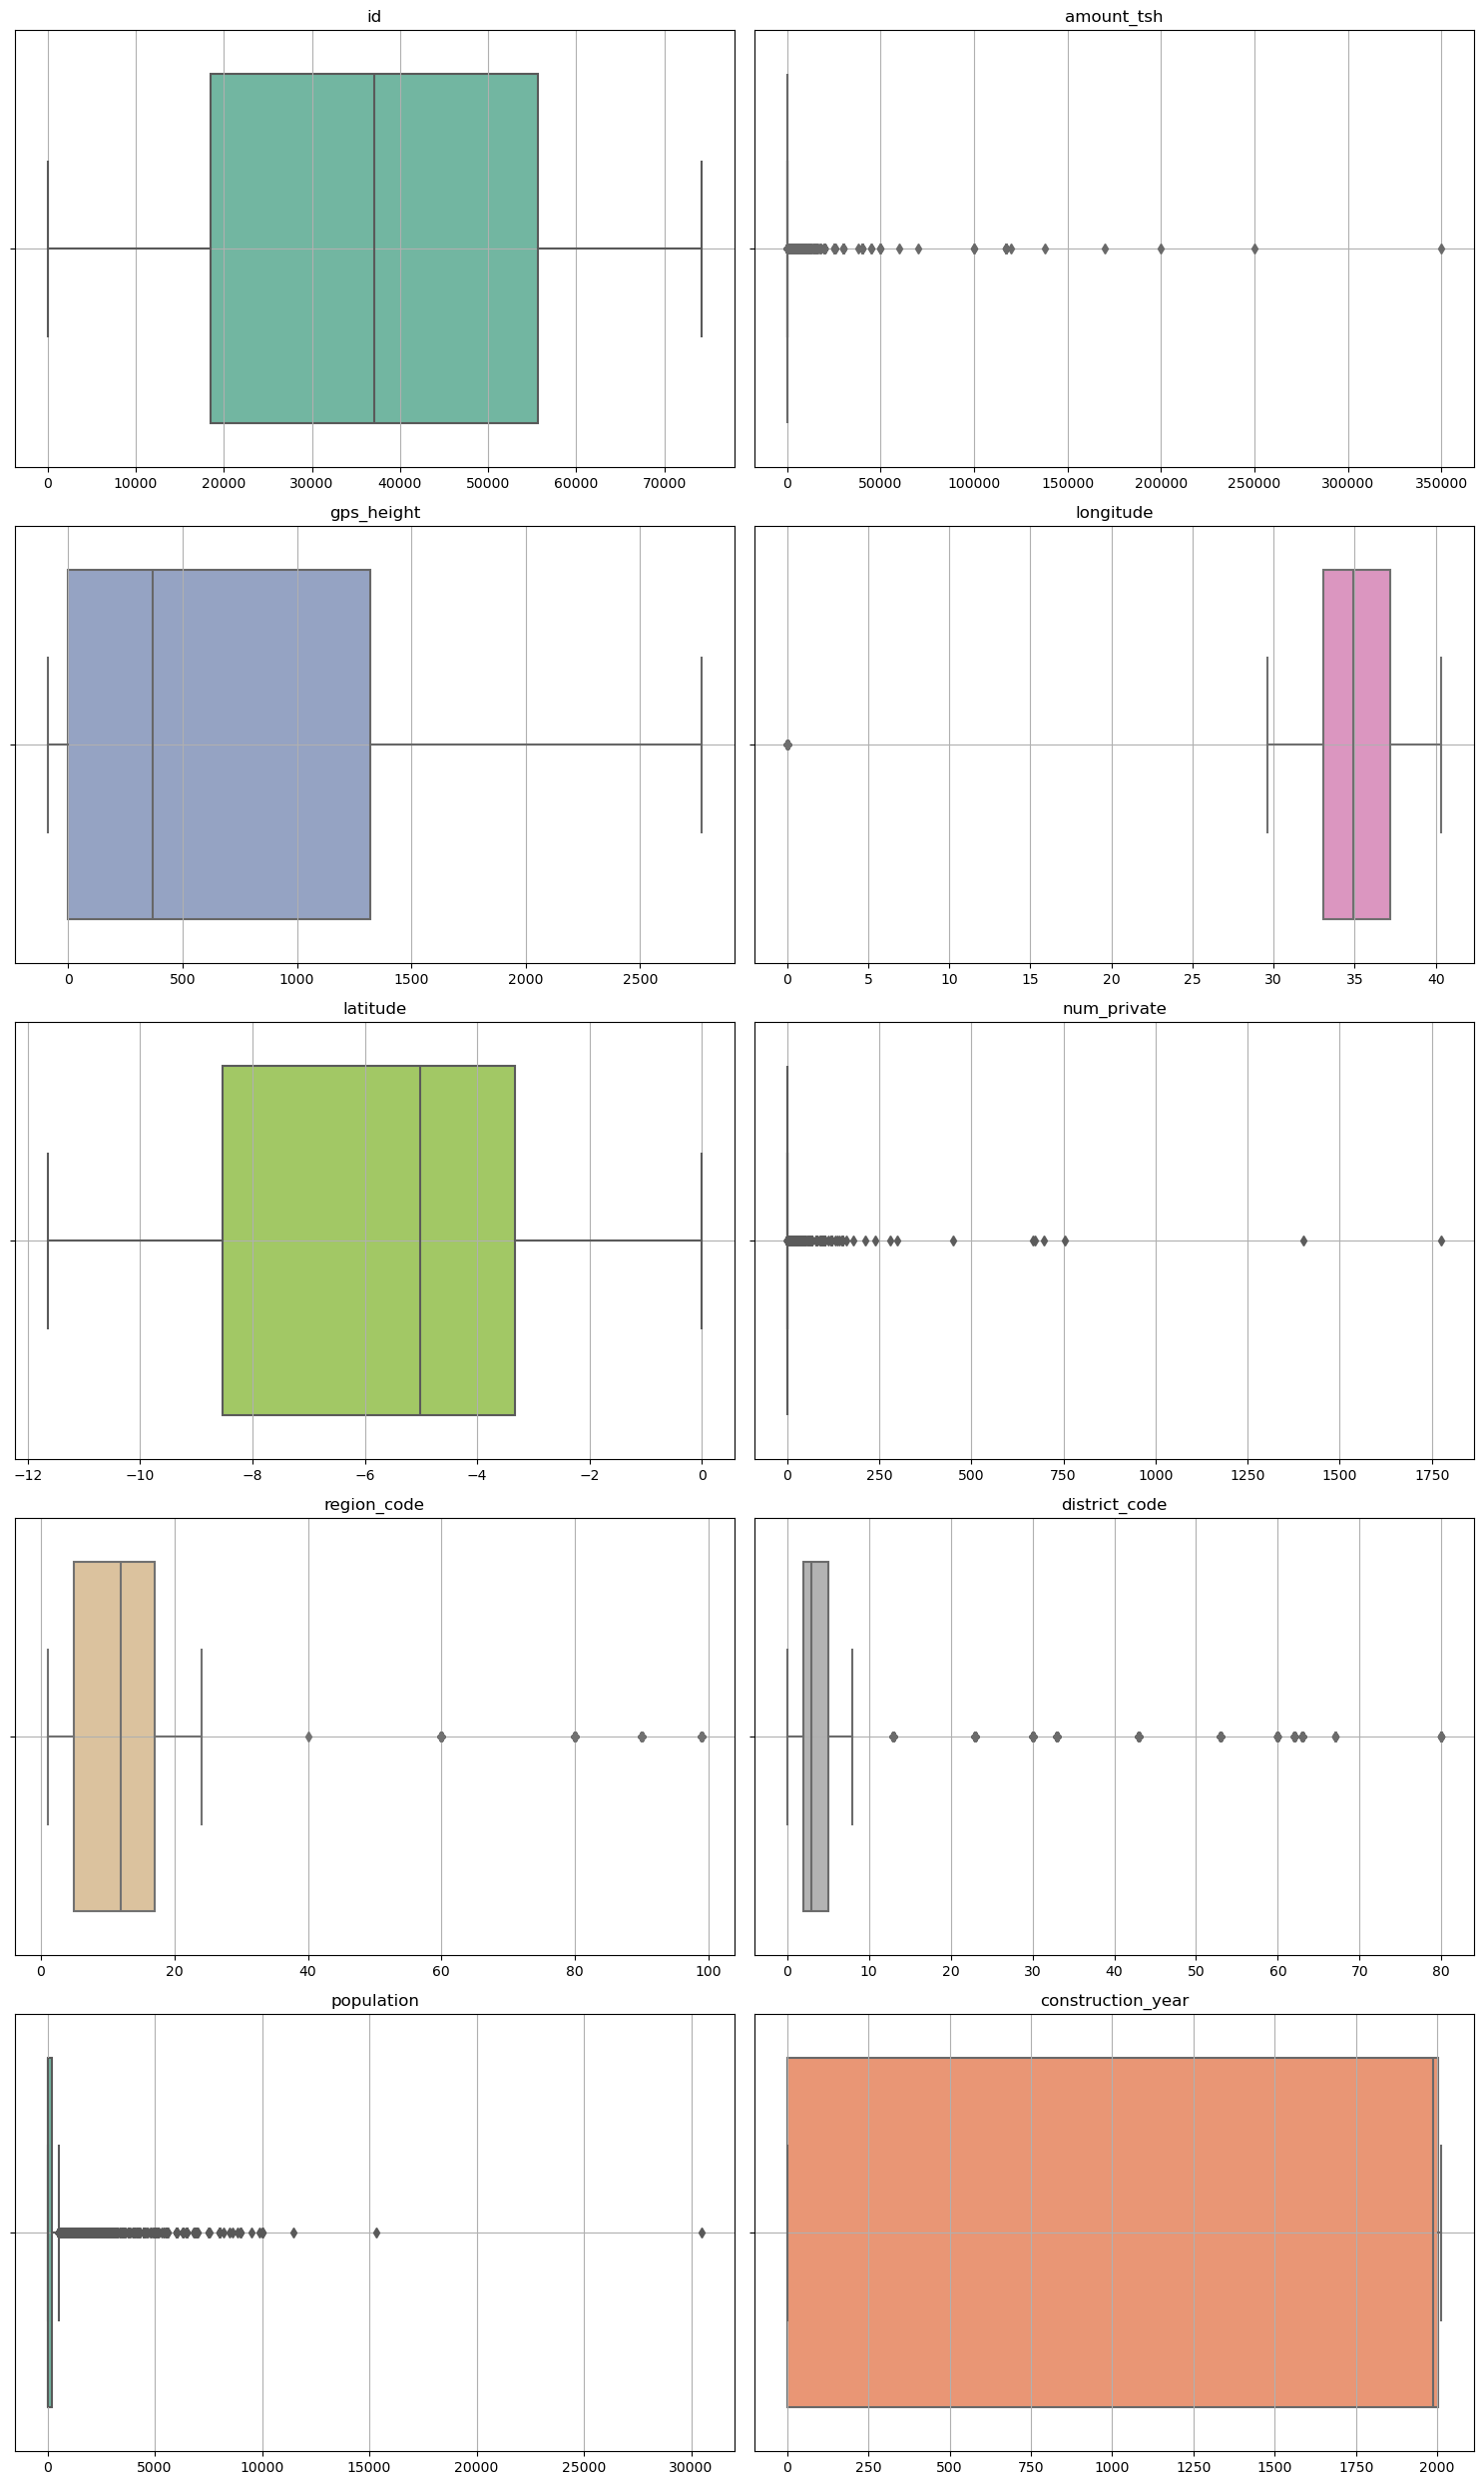

In [17]:
# Outliers
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of columns for the layout
num_columns = 2

# Calculate the number of rows needed
num_rows = len(numerical_columns) // num_columns + (len(numerical_columns) % num_columns > 0)

# Create a figure and set the size
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a colormap
color_map = sns.color_palette("Set2")

# Iterate over numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i], color=color_map[i % len(color_map)])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


The outliers can be ignored since removing them will be altering the data

## Exploratory Data Analysis

### Univariate Analysis

### amount_tsh

This is Total static head (amount water available to waterpoint). 

In [18]:
# Looking at the unique values in the amount_tsh feature.
df['amount_tsh'].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

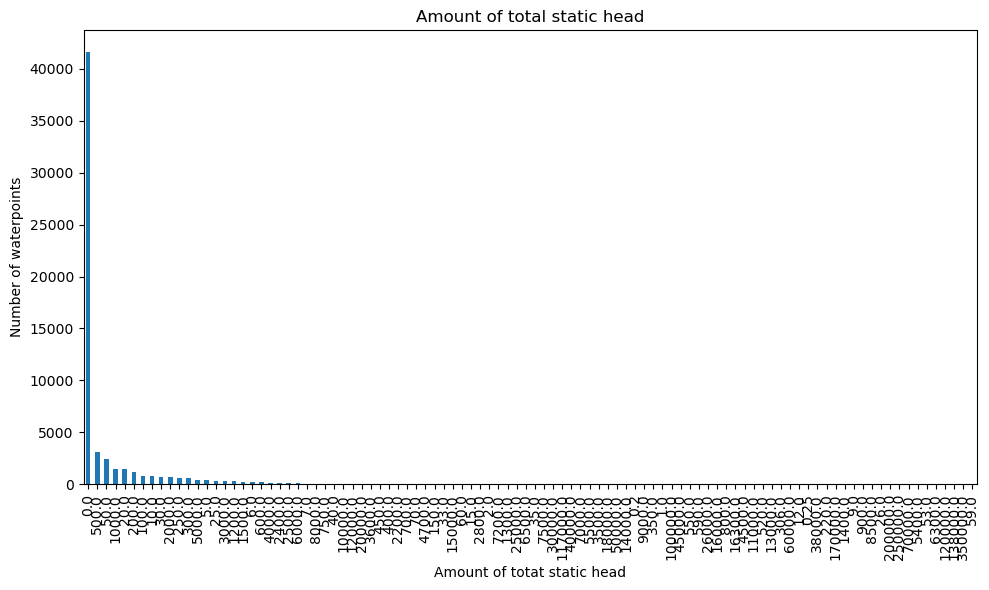

In [19]:
# creating a variable to store the value counts 
category_counts = df['amount_tsh'].value_counts()

# Creating a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Amount of total static head')
plt.xlabel('Amount of totat static head')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

As seen above, 41,639 values are 0.0, means at these waterpoints the  water available is at the surface.

### funder

This feature had null values, we'll handle them in this section. 
The funder column represents different categories of project funders. It is prudent to replace the null values with unknown. This is because, crediting a project to a funder who did not fund it will be unprofessional. It is better to acknowledge that the data is missing.

In [20]:
# Filling the null values with unknown.
df['funder'].fillna(value='Unknown', inplace=True)

Then, it's prudent to understand the unique values of this feature.

In [21]:
df['funder'].value_counts()

funder
Government Of Tanzania    9084
Unknown                   3641
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: count, Length: 1896, dtype: int64

This column has 1896 unique values. Here's a look at the first 25

In [22]:
df['funder'].value_counts().head(25)

funder
Government Of Tanzania    9084
Unknown                   3641
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Name: count, dtype: int64

One of the values in the column is labeled zero. We change it's name to unknown. We would not want to credit work done to someone else.

In [23]:
# Replacing value 0 with unknown
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [24]:
# first 25 unique values
df['funder'].value_counts().head(25)

funder
Government Of Tanzania    9084
Unknown                   4418
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Name: count, dtype: int64

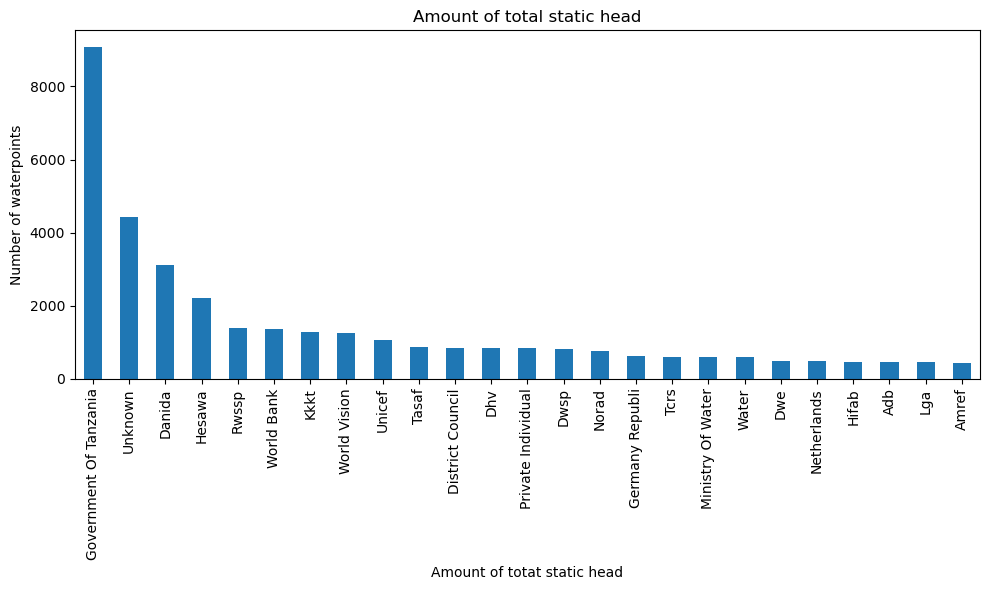

In [25]:
# Creating a variable to store the value counts 
category_counts = df['funder'].value_counts().head(25)

# Creating a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Amount of total static head')
plt.xlabel('Amount of totat static head')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Installer

This column, also, had null values. 
As shown in the funder analysis, we fill the null values with unknown.

In [26]:
df['installer'].fillna(value='Unknown', inplace=True)

We can then look at the first 50 unique values of the column to get a better understanding of it.

In [27]:
df['installer'].value_counts().head(100)

installer
DWE                          17402
Unknown                       3658
Government                    1825
RWE                           1206
Commu                         1060
                             ...  
District water department       89
Missi                           87
H                               86
Shipo                           86
AICT                            84
Name: count, Length: 100, dtype: int64

We can notice some values mean the same but are misspelt.

In [28]:
# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [29]:
# Top 25 values
df['installer'].value_counts().head(25)

installer
DWE                   17402
Unknown                3658
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
0                       777
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
LGA                     408
villagers               408
WEDECO                  397
TASAF                   396
Unicef                  332
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
Name: count, dtype: int64

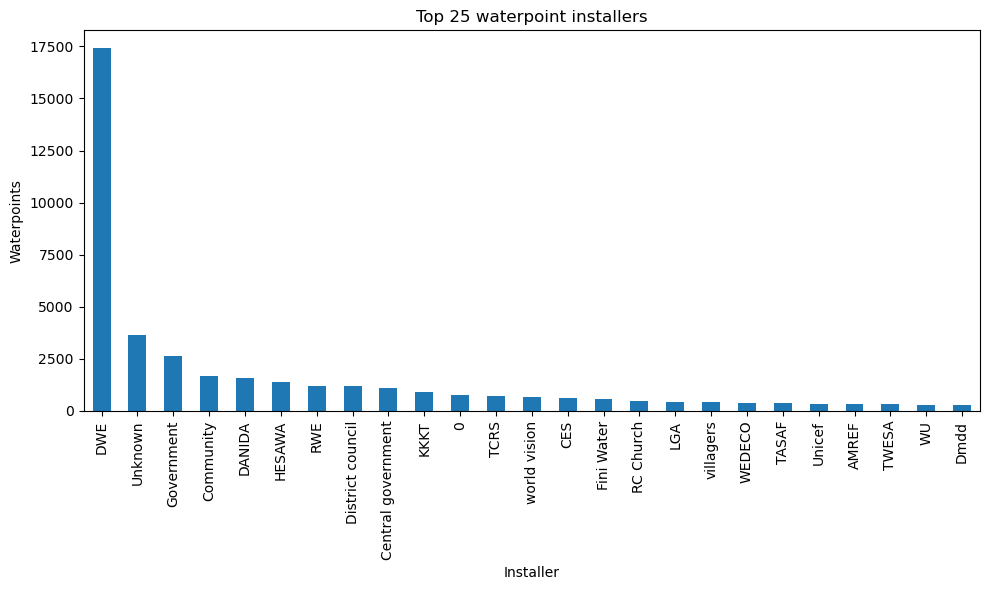

In [30]:
# Creating a variable to store the value counts 
category_counts = df['installer'].value_counts().head(25)

# Creating bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Top 25 waterpoint installers')
plt.xlabel('Installer')
plt.ylabel('Waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

As seen above, DWE has installed most waterpoints in Tanzania.

### gps_height

This feature shows the altitude of each well. 

In [31]:
df['gps_height'].value_counts()

gps_height
 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: count, Length: 2428, dtype: int64

As seen above, 20438 waterpoints are at an altitude of 0.

### basin

In [32]:
# The unique basins where the waterpoints are distributed.
df['basin'].value_counts()

basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64

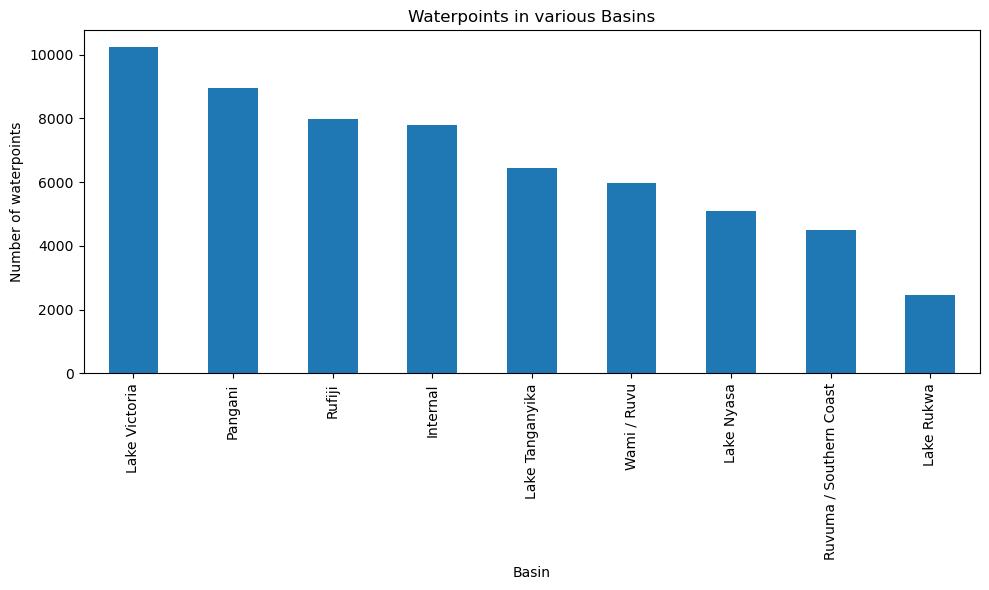

In [33]:

category_counts = df['basin'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Waterpoints in various Basins')
plt.xlabel('Basin')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

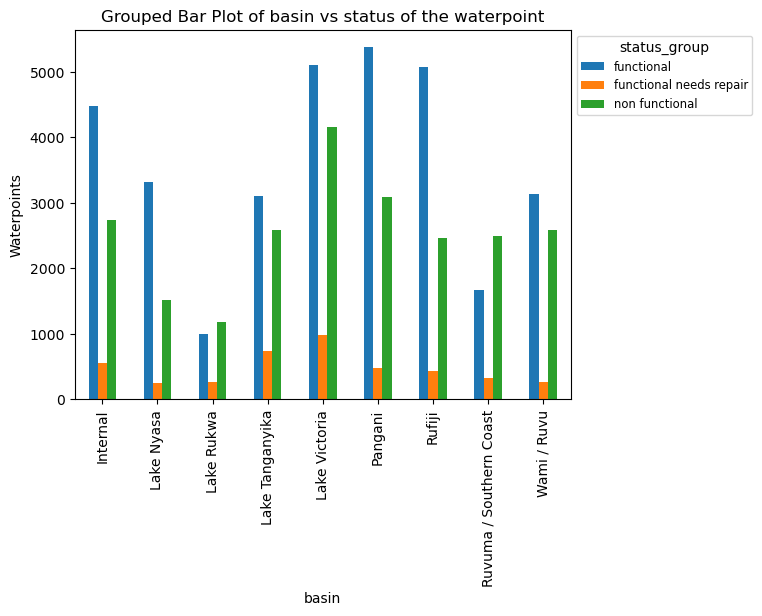

In [34]:
# using matplotlib 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['basin', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of basin vs status of the waterpoint')
plt.xlabel('basin')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### subvillage, region and region_code

The region feature is a categorized subvillage feature and is given codes the region_code feature.

In [35]:
df['subvillage'].value_counts()

subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64

In [36]:
df['region'].value_counts()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

In [37]:
df['region_code'].value_counts()

region_code
11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: count, dtype: int64

In [38]:
print(f"The number of unique values in the region feature is: {len(df['region'].value_counts())}")
print(f"While, the number of unique values in the region_code feature is: {len(df['region_code'].value_counts())}")

The number of unique values in the region feature is: 21
While, the number of unique values in the region_code feature is: 27


The region feature can be used since it categorizes the information in subvillage. region_code is the region(geographical location) but coded. We can proceed the analysis with the region feature.

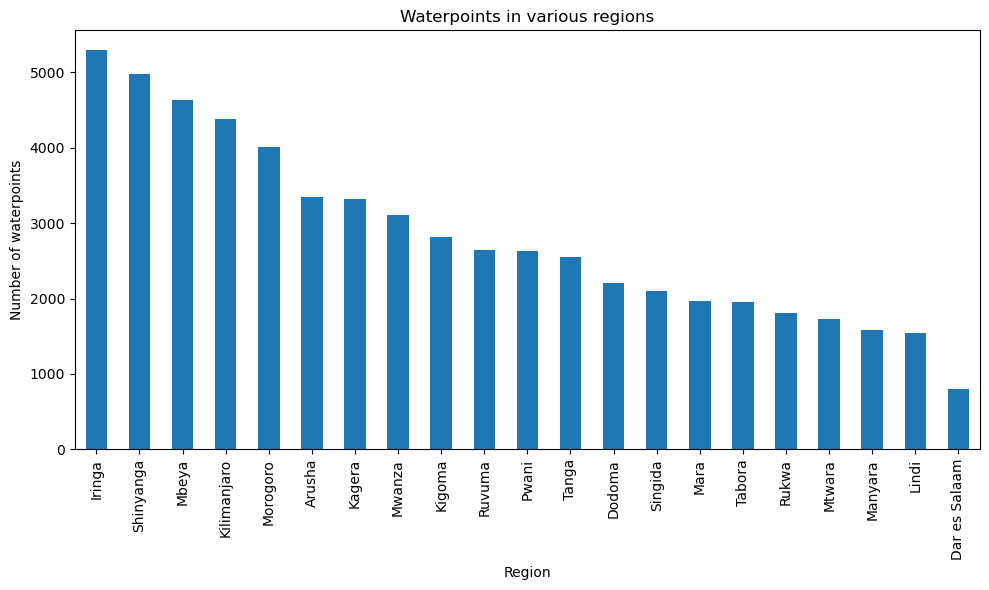

In [39]:
category_counts = df['region'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Waterpoints in various regions')
plt.xlabel('Region')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### district_code, lga, ward

In [40]:
df['district_code'].value_counts()
print(len(df['district_code'].value_counts()))

20


In [41]:
df['lga'].value_counts()

lga
Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: count, Length: 125, dtype: int64

In [42]:
df['ward'].value_counts()

ward
Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: count, Length: 2092, dtype: int64

Since we used the region feature, we'll drop these features.

### population

In [43]:
df['population'].value_counts()

population
0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: count, Length: 1049, dtype: int64

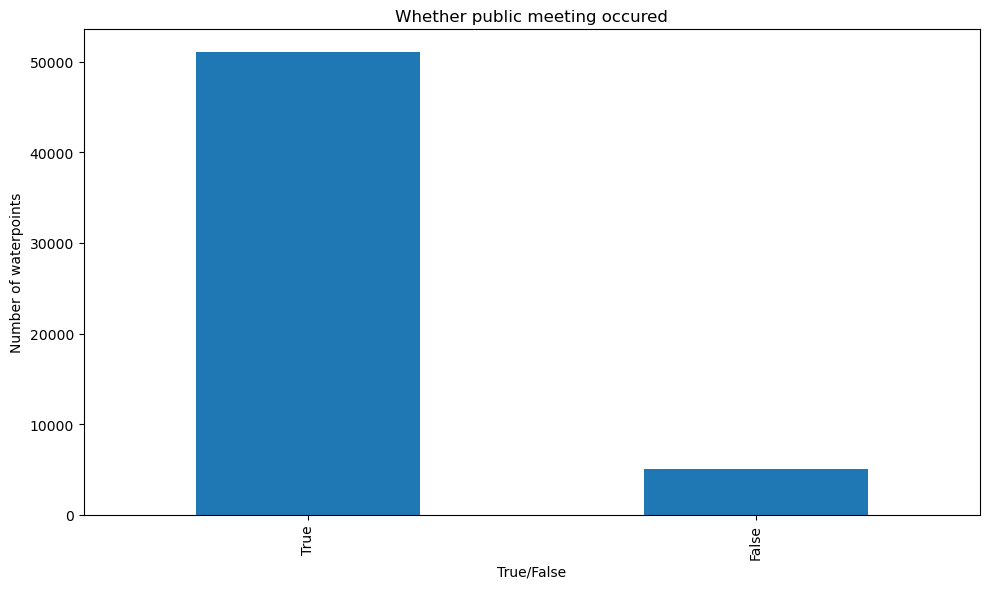

In [44]:
category_counts = df['public_meeting'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Whether public meeting occured')
plt.xlabel('True/False')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### public_meeting

In [45]:
df['public_meeting'].value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

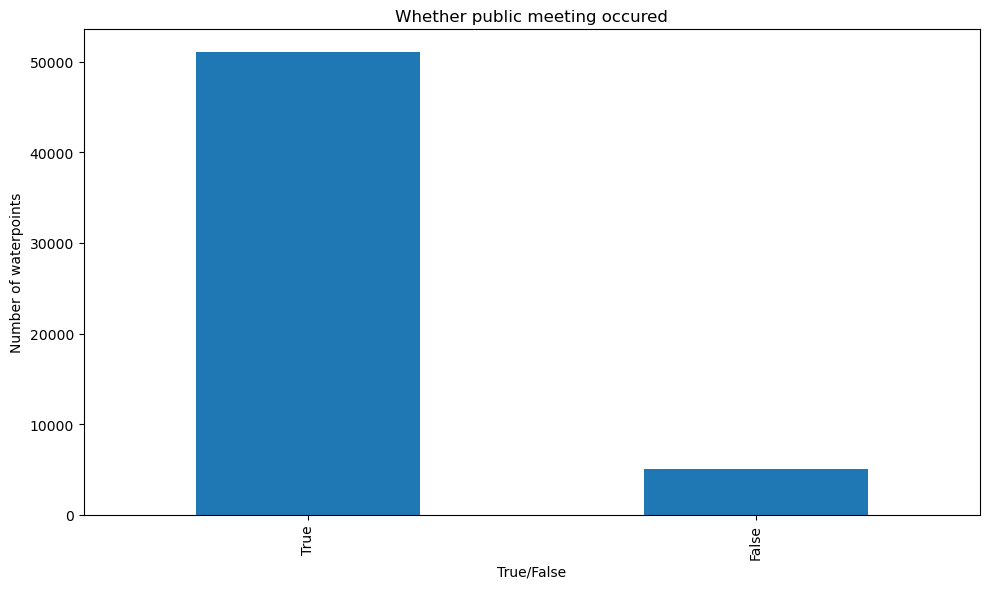

In [46]:
category_counts = df['public_meeting'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Whether public meeting occured')
plt.xlabel('True/False')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### recorded_by

In [47]:
df['recorded_by'].value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

One entry so we drop this column.

### scheme_management

In [48]:
df['scheme_management'].value_counts()

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

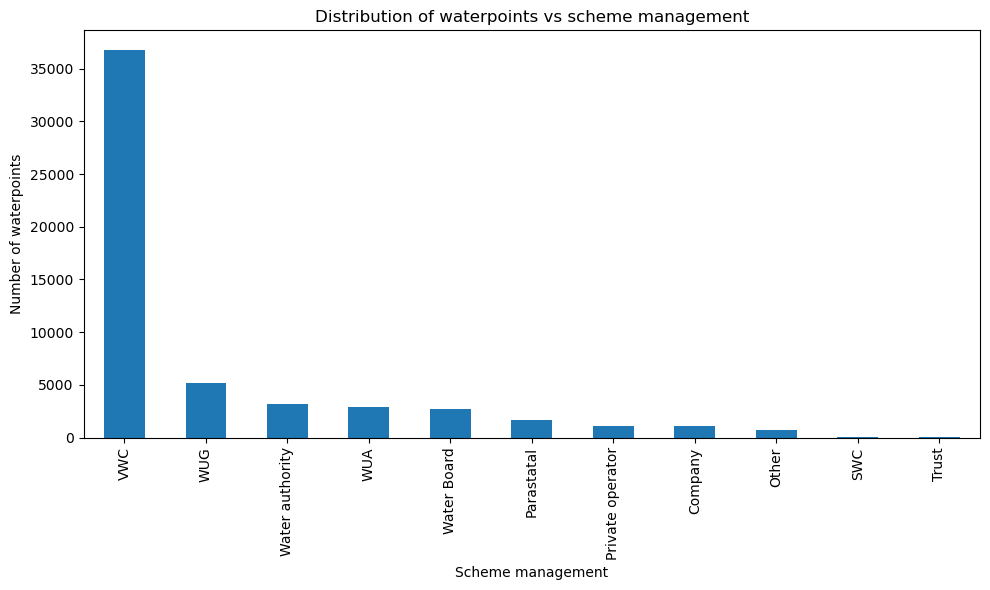

In [49]:
category_counts = df['scheme_management'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs scheme management')
plt.xlabel('Scheme management')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### permit

In [50]:
df['permit'].value_counts()

permit
True     38852
False    17492
Name: count, dtype: int64

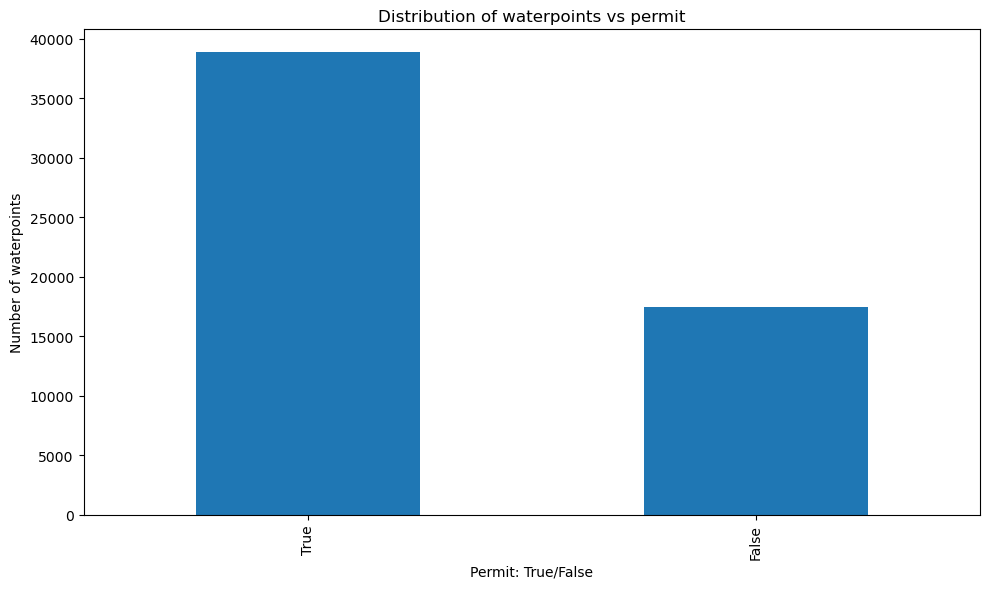

In [51]:
category_counts = df['permit'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs permit')
plt.xlabel('Permit: True/False')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### construction_year

In [52]:
df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

In [53]:
df.loc[df['construction_year']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


Median is year 2000. We replace all values 0 with 2000.

In [54]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [55]:
df['year_interval'] = df['construction_year']

In [56]:
df['year_interval'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60-69' , inplace=True)
df['year_interval'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70-79' , inplace=True)
df['year_interval'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80-89' , inplace=True)
df['year_interval'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90-99' , inplace=True)
df['year_interval'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00-09' , inplace=True)
df['year_interval'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10-19' , inplace=True)

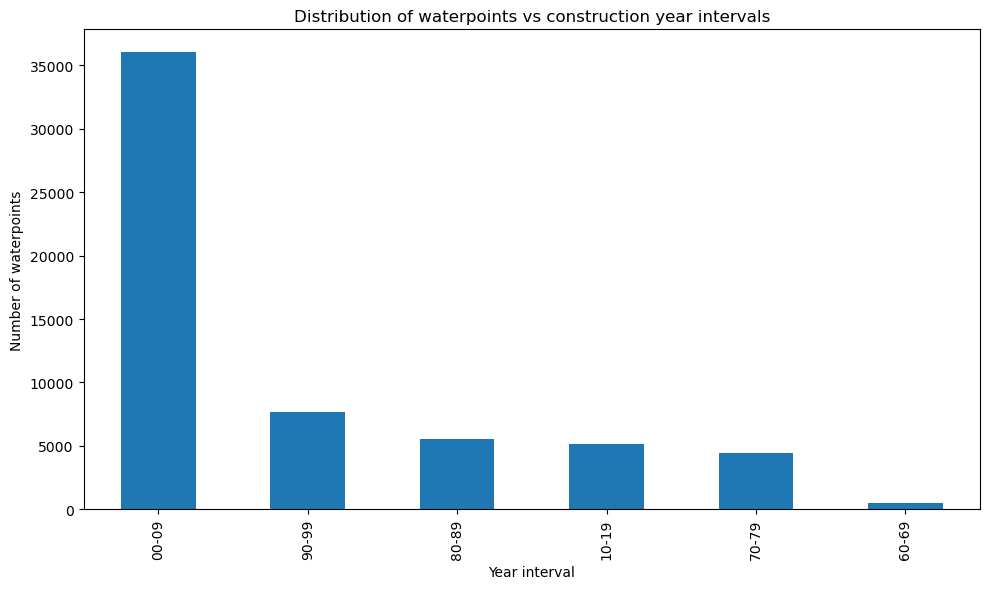

In [57]:
category_counts = df['year_interval'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs construction year intervals')
plt.xlabel('Year interval')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The construction_year feature will be replaced by year_interval feature.

### extraction_type, extraction_type_group, extraction_type_class

In [58]:
df['extraction_type'].value_counts()

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [59]:
df['extraction_type_group'].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [60]:
df['extraction_type_class'].value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

We opt for the extraction_type feature since it gives more information on the waterpoints.

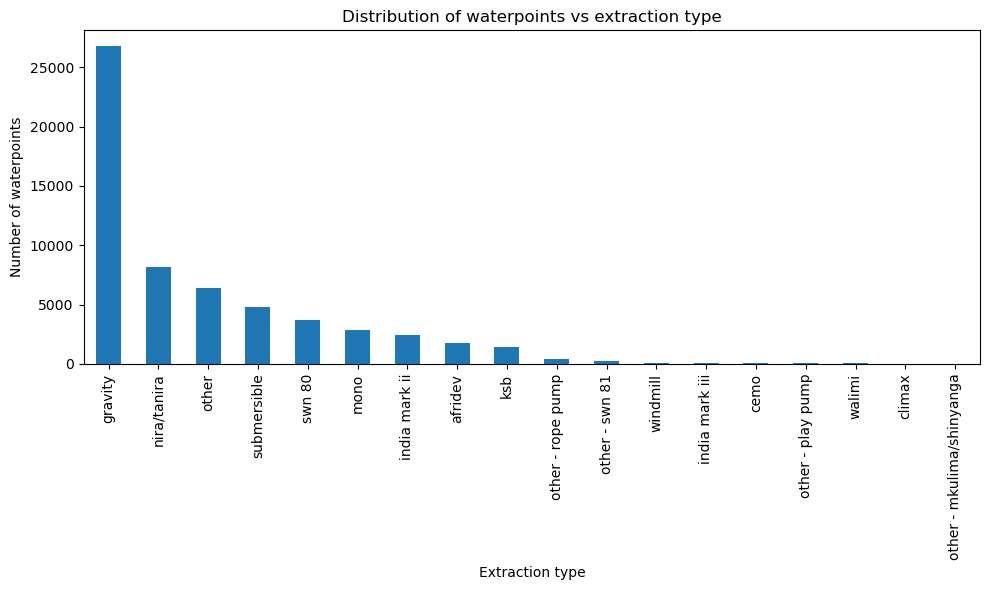

In [61]:
category_counts = df['extraction_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs extraction type')
plt.xlabel('Extraction type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

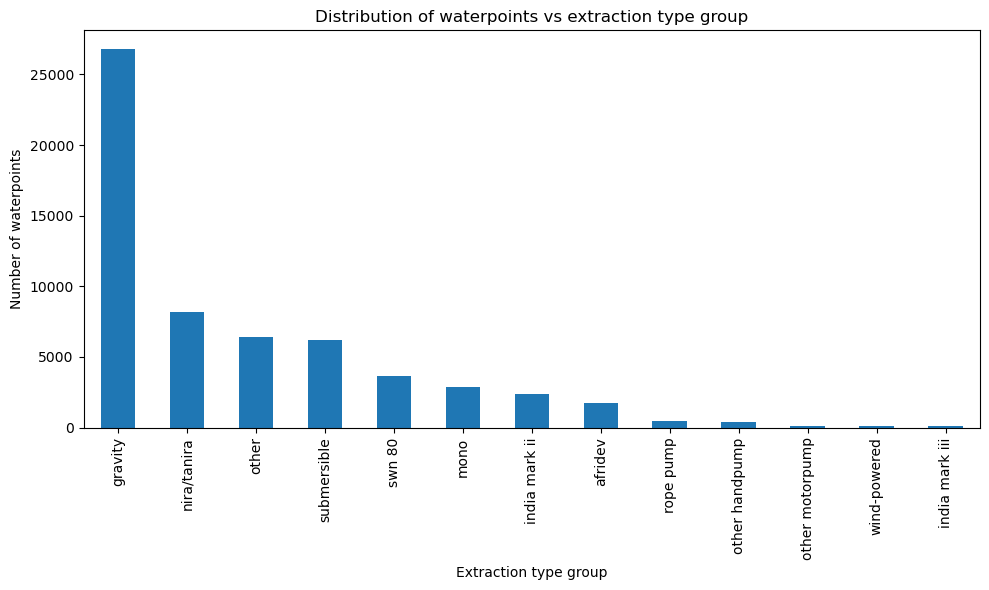

In [62]:
category_counts = df['extraction_type_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs extraction type group')
plt.xlabel('Extraction type group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

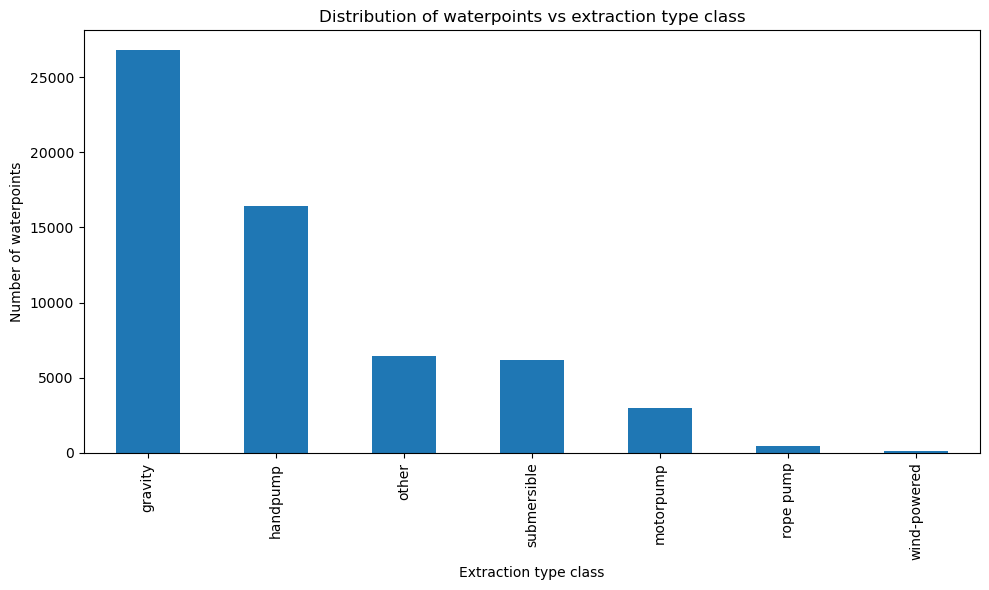

In [63]:
category_counts = df['extraction_type_class'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs extraction type class')
plt.xlabel('Extraction type class')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### management, management_group

In [64]:
df['management'].value_counts()

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

In [65]:
df['management_group'].value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

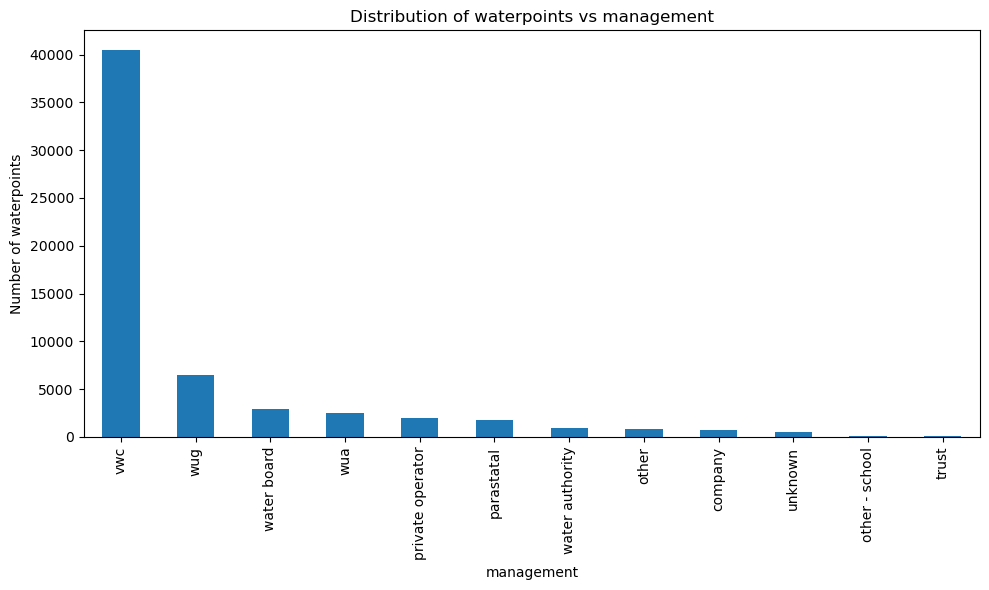

In [66]:
category_counts = df['management'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs management')
plt.xlabel('management')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

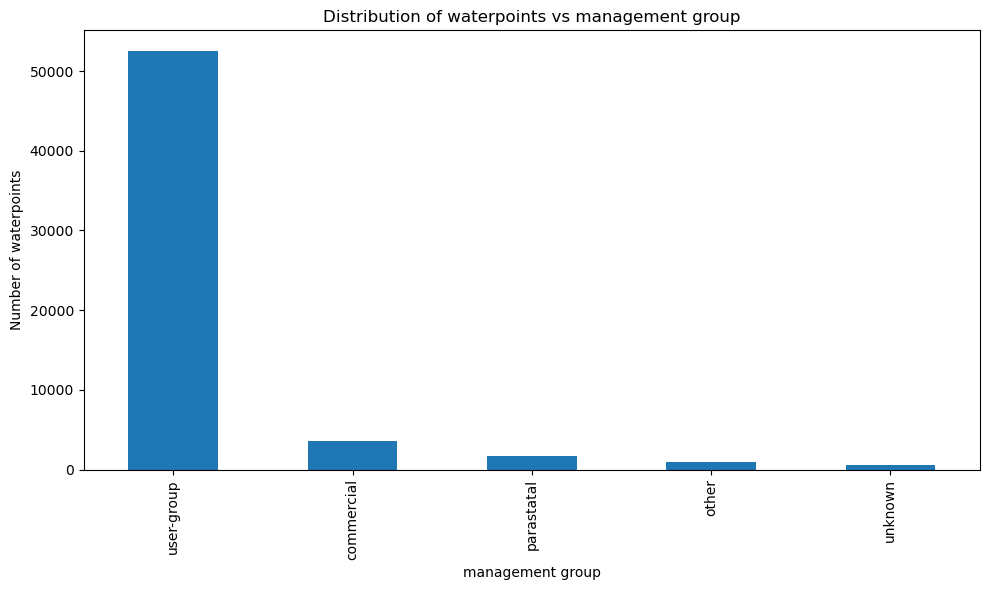

In [67]:
category_counts = df['management_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs management group')
plt.xlabel('management group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We opt for the management feature since it gives more information on the waterpoints.

### payment, payment_type

In [68]:
df['payment'].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

In [69]:
df['payment_type'].value_counts()

payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64

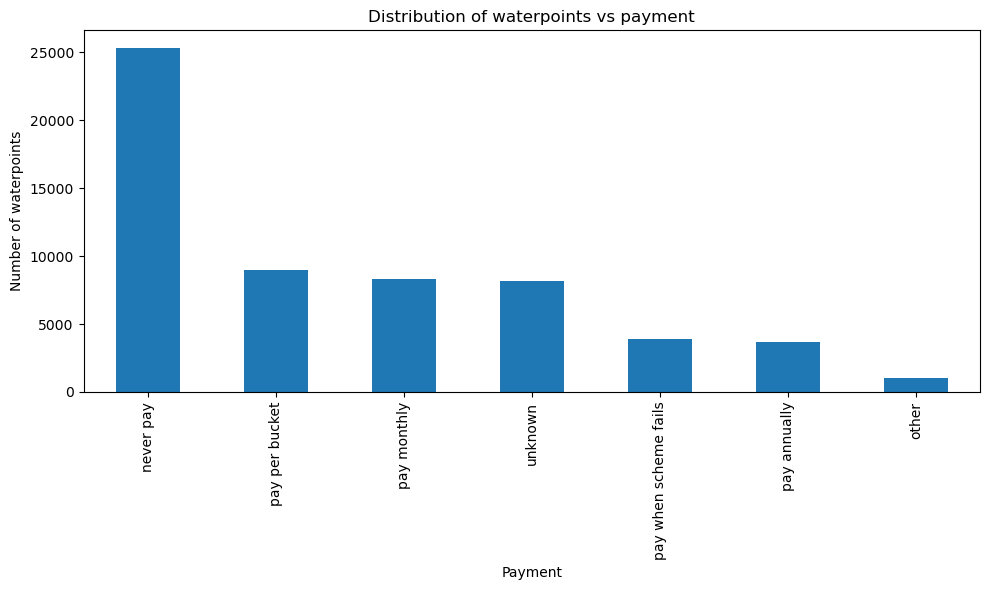

In [70]:
category_counts = df['payment'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs payment')
plt.xlabel('Payment')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

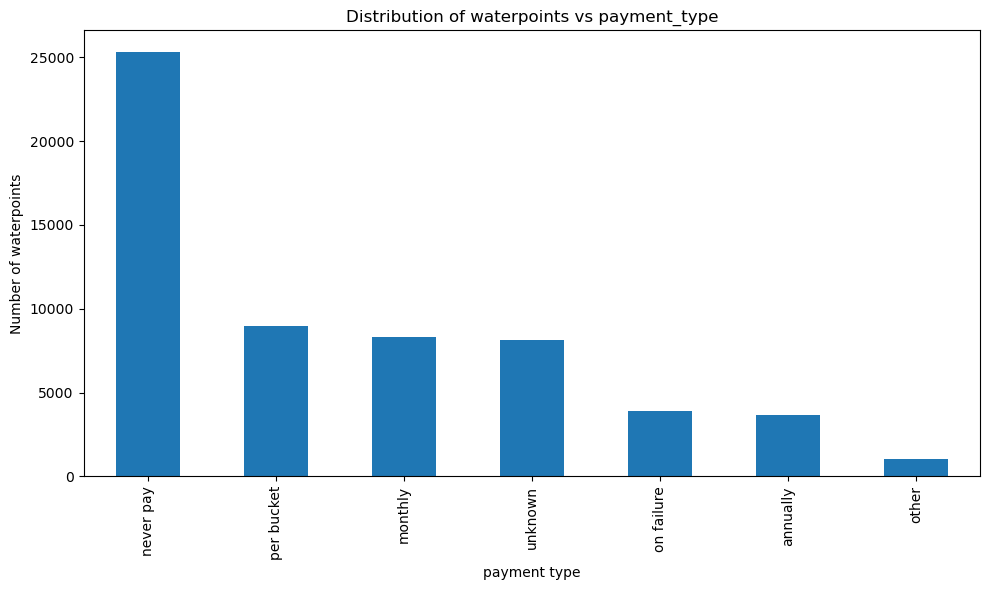

In [71]:
category_counts = df['payment_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs payment_type')
plt.xlabel('payment type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We opt for the payment feature since it gives more information on the waterpoints.

### water_quality, quality_group

In [72]:
df['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [73]:
df['quality_group'].value_counts()

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

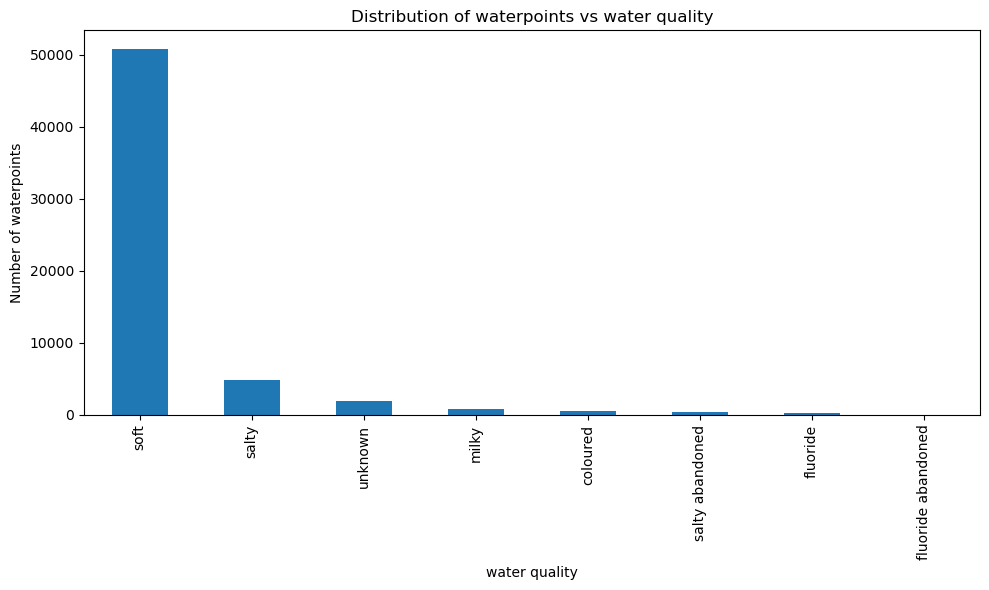

In [74]:
category_counts = df['water_quality'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs water quality')
plt.xlabel('water quality')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

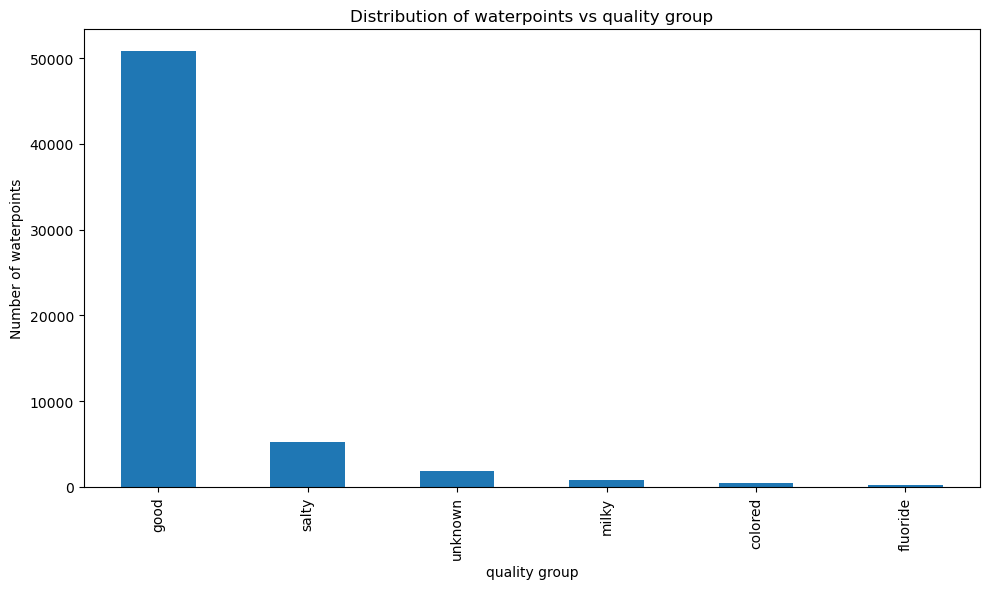

In [75]:
category_counts = df['quality_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs quality group')
plt.xlabel('quality group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We opt for the water_quality feature since it gives more information on the waterpoints.

### quantity, quantity_group

In [76]:
df['quantity'].value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [77]:
df['quantity_group'].value_counts()

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

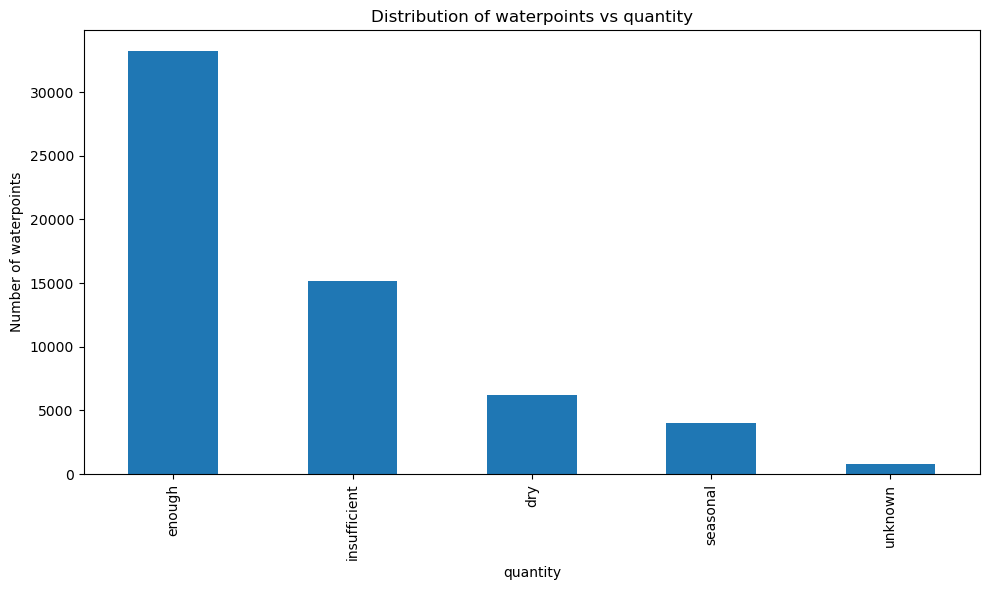

In [78]:
category_counts = df['quantity'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs quantity')
plt.xlabel('quantity')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

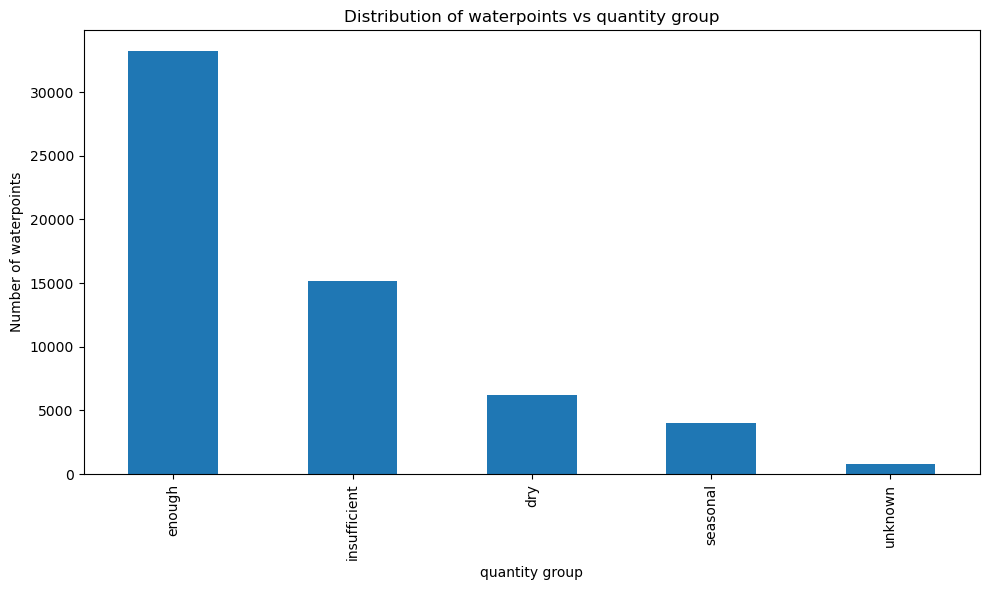

In [79]:
category_counts = df['quantity_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs quantity group')
plt.xlabel('quantity group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We opt for the quantity feature since it gives more information on the waterpoints.

### source, source_type, source_class

In [80]:
df['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [81]:
df['source_type'].value_counts()

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

In [82]:
df['source_class'].value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

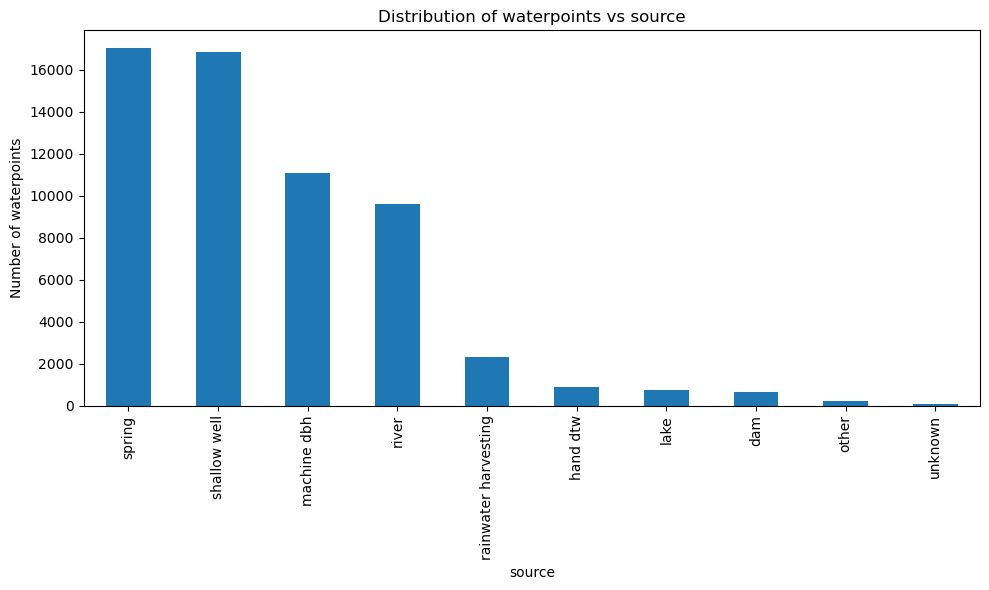

In [83]:
category_counts = df['source'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs source')
plt.xlabel('source')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

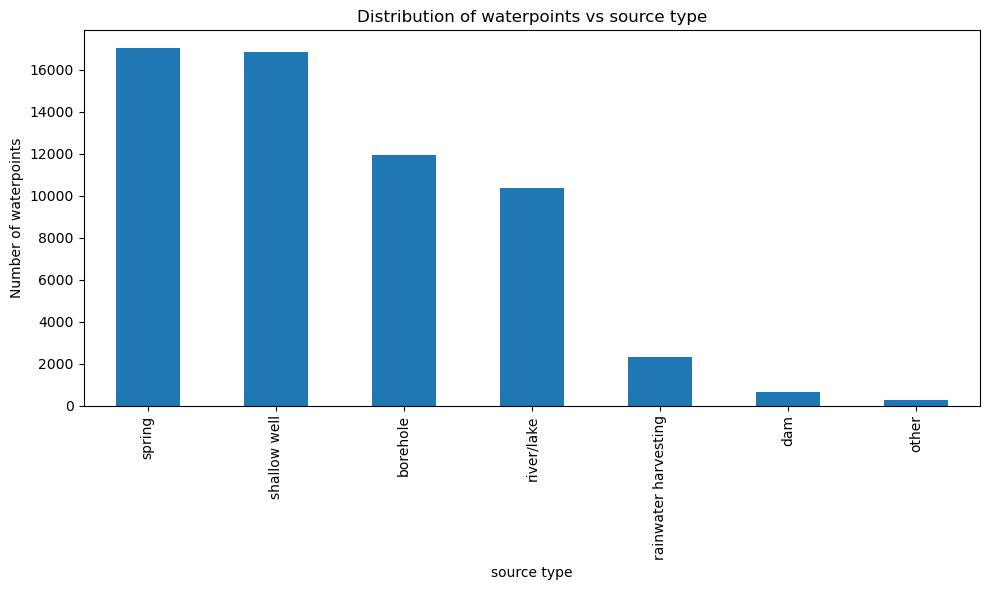

In [84]:
category_counts = df['source_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs source type')
plt.xlabel('source type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

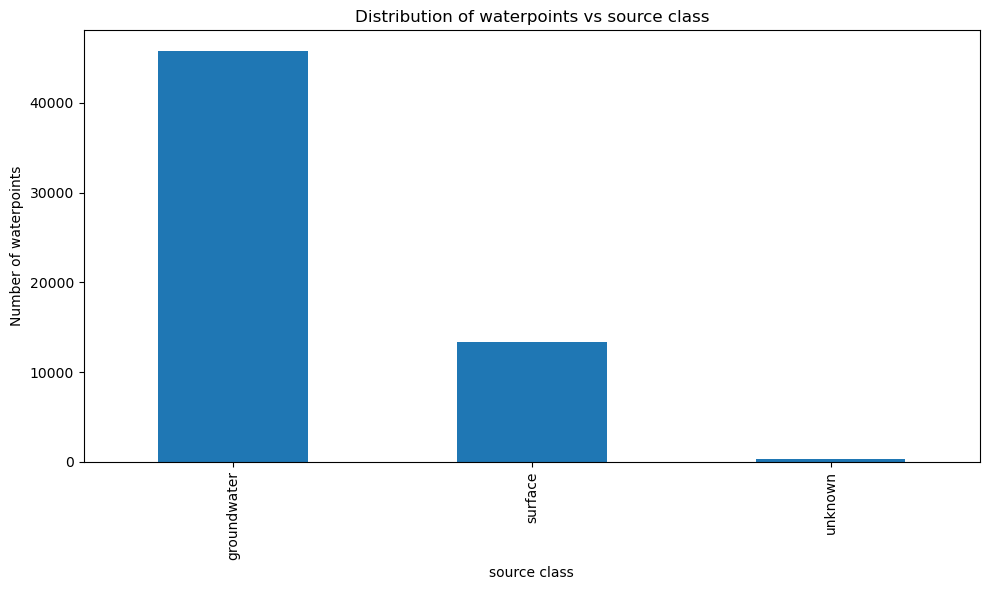

In [85]:
category_counts = df['source_class'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs source class')
plt.xlabel('source class')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We opt for the source feature since it gives more information on the waterpoints.

### waterpoint_type, waterpoint_type_group

In [86]:
df['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [87]:
df['waterpoint_type_group'].value_counts()

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

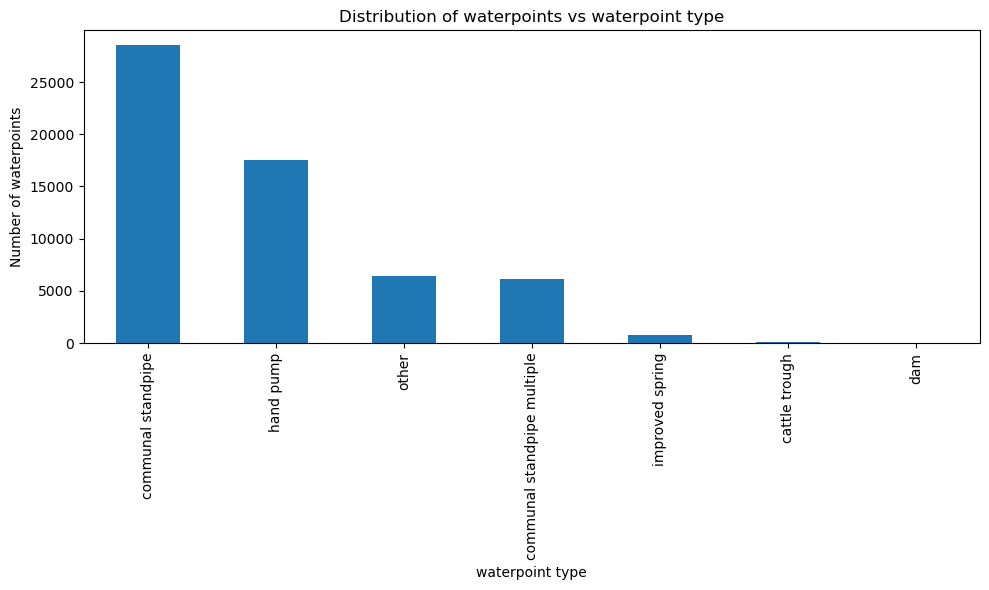

In [88]:
category_counts = df['waterpoint_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs waterpoint type')
plt.xlabel('waterpoint type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

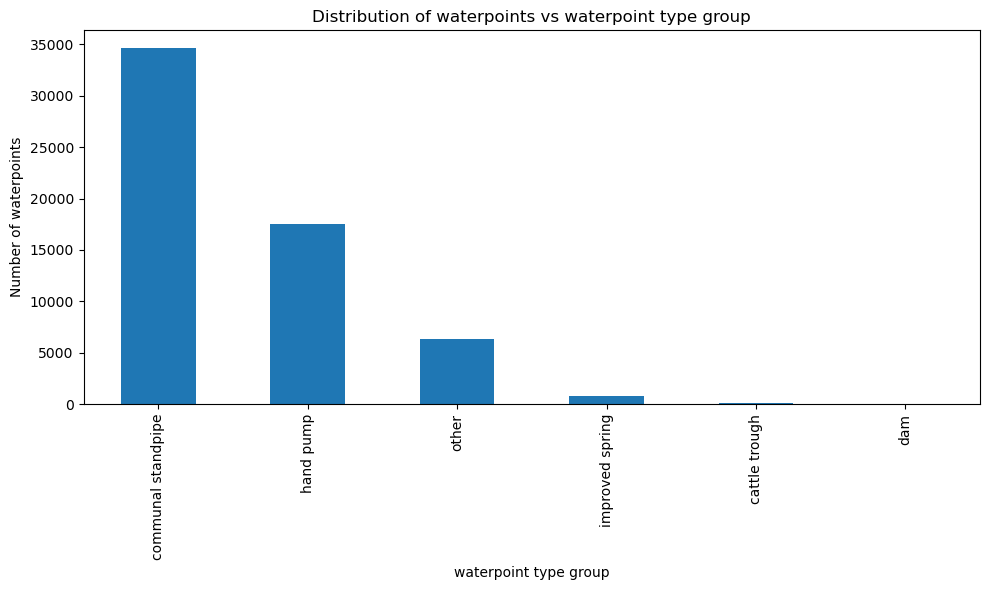

In [89]:
category_counts = df['waterpoint_type_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs waterpoint type group')
plt.xlabel('waterpoint type group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We opt for the waterpoint_type feature since it gives more information on the waterpoints.

### status_group

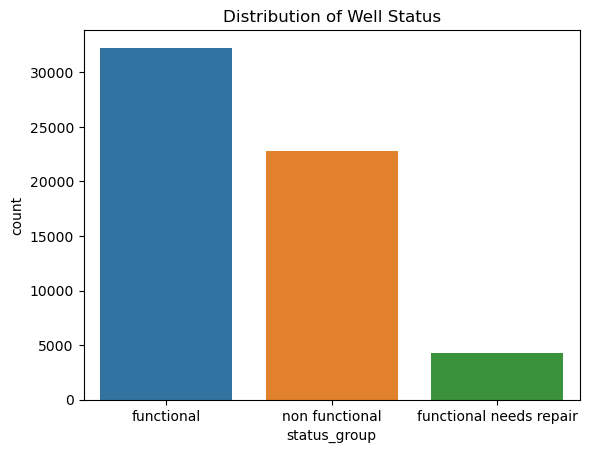

In [90]:
# Univariate Analysis
# Distribution of well status
sns.countplot(x='status_group', data=df)
plt.title('Distribution of Well Status')
plt.show()

### Bivariate Analysis

<Figure size 3000x1500 with 0 Axes>

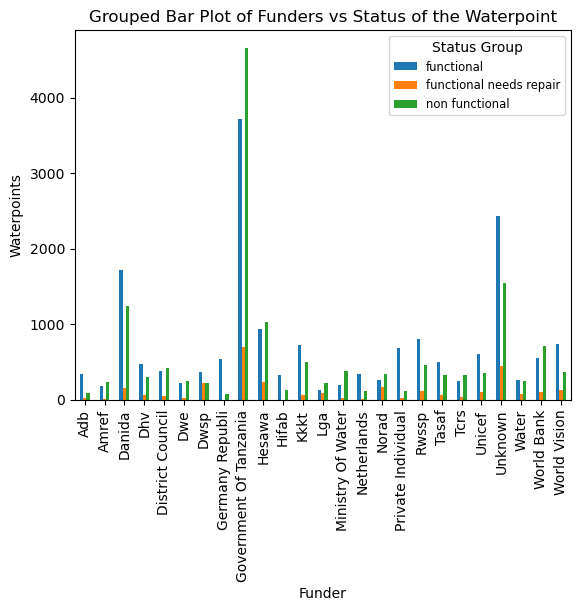

In [91]:
# Funder
# Get the top 25 funders
top_funders = df['funder'].value_counts().head(25).index

# Filter the DataFrame to include only the top 25 funders
filtered_df = df[df['funder'].isin(top_funders)]

# Group by 'funder' and 'status_group' and calculate the size of each group
grouped_counts = pd.crosstab(filtered_df['funder'], filtered_df['status_group'])

# Plot the grouped bar plot
plt.figure(figsize=(30, 15))
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of Funders vs Status of the Waterpoint')
plt.xlabel('Funder')
plt.ylabel('Waterpoints')
plt.xticks(rotation=90)
plt.legend(title='Status Group', fontsize='small', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

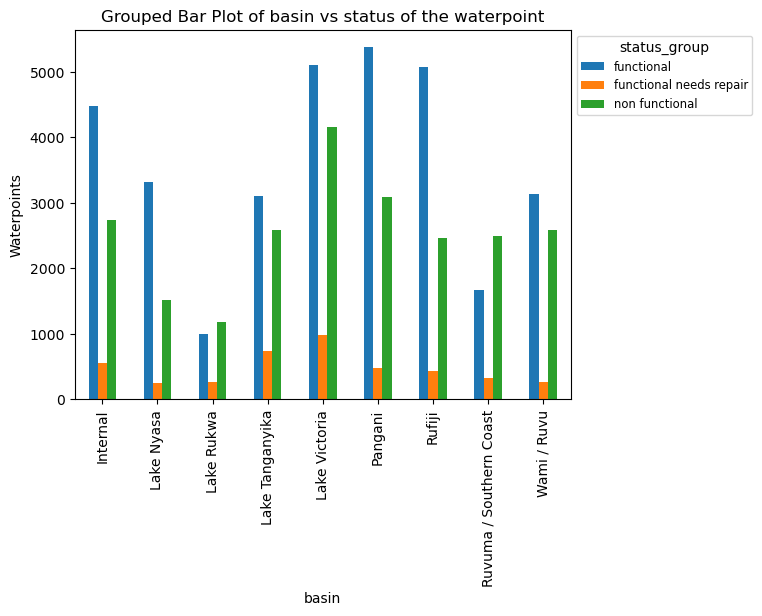

In [92]:
# basin
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['basin', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of basin vs status of the waterpoint')
plt.xlabel('basin')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

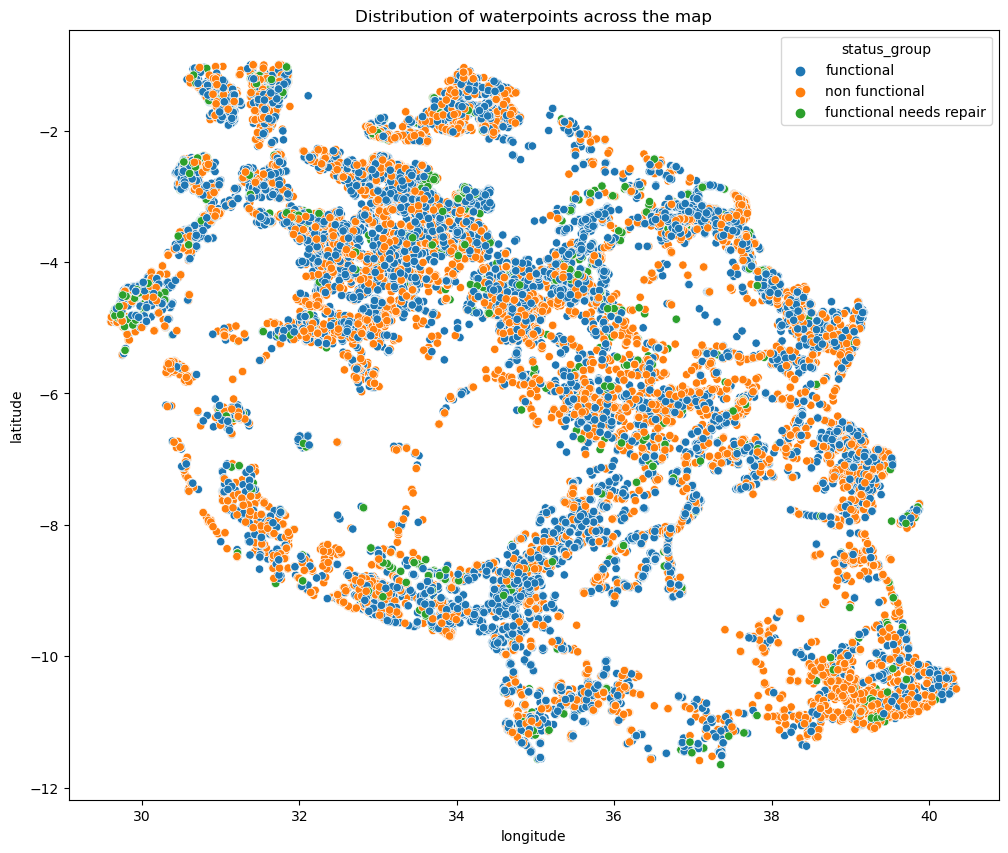

In [93]:
# longitude and latitude
plt.figure(figsize=(12,10))
sns.scatterplot(x="longitude", y="latitude", data=df[~df.longitude.isin([0])],hue="status_group")
plt.title('Distribution of waterpoints across the map')
plt.show()

<Figure size 3000x1500 with 0 Axes>

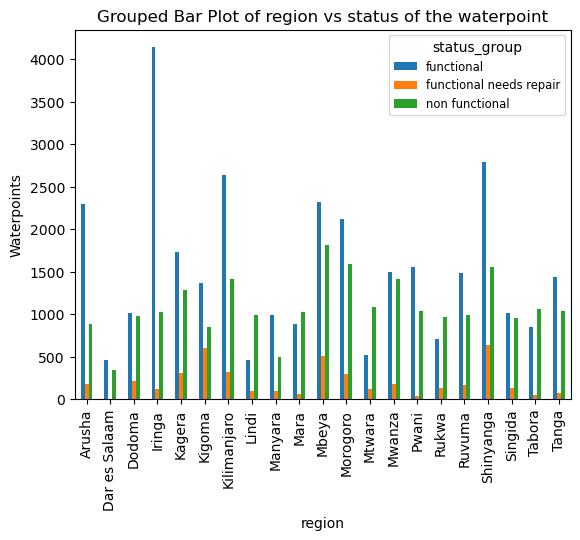

In [94]:
# region 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['region', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of region vs status of the waterpoint')
plt.xlabel('region')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

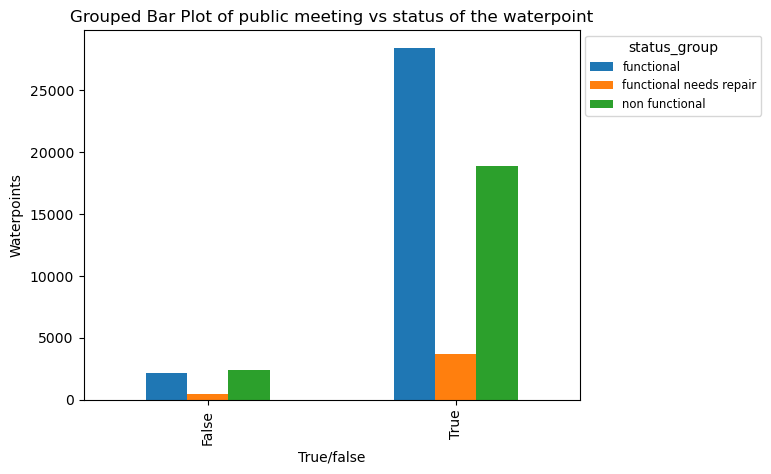

In [95]:
# public meeting 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['public_meeting', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of public meeting vs status of the waterpoint')
plt.xlabel('True/false')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

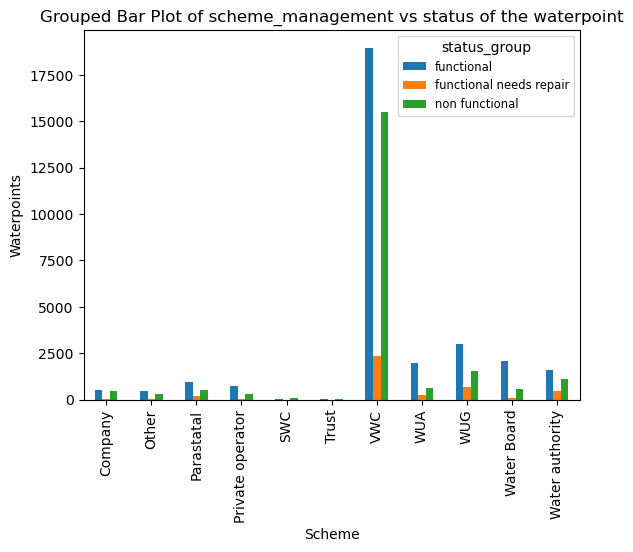

In [96]:
# scheme management 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['scheme_management', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of scheme_management vs status of the waterpoint')
plt.xlabel('Scheme')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

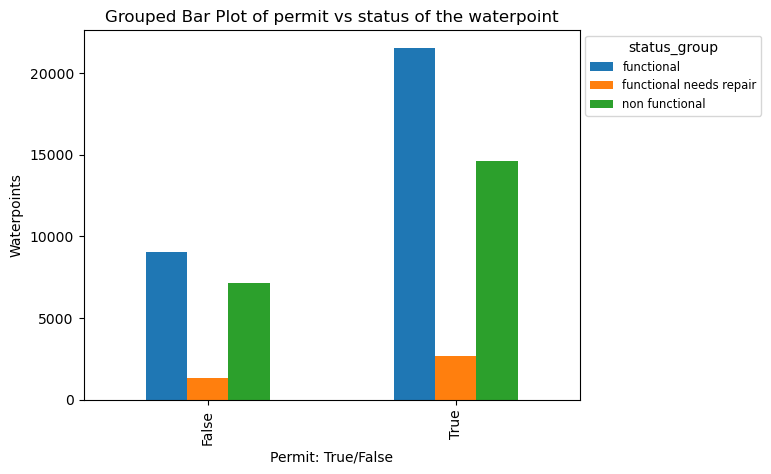

In [97]:
# permit
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['permit', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of permit vs status of the waterpoint')
plt.xlabel('Permit: True/False')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

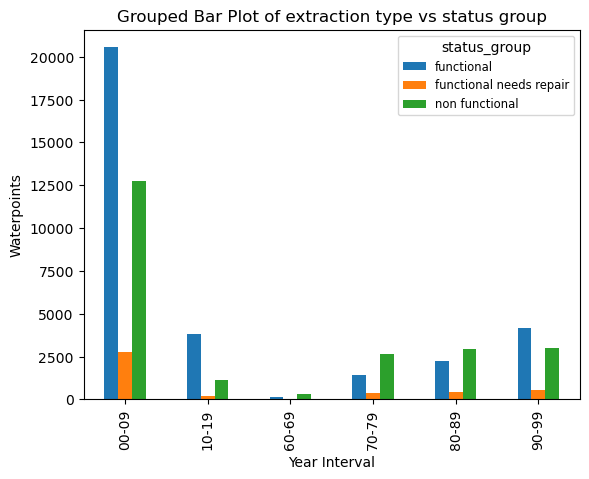

In [98]:
# year interval
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['year_interval', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of extraction type vs status group')
plt.xlabel('Year Interval')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

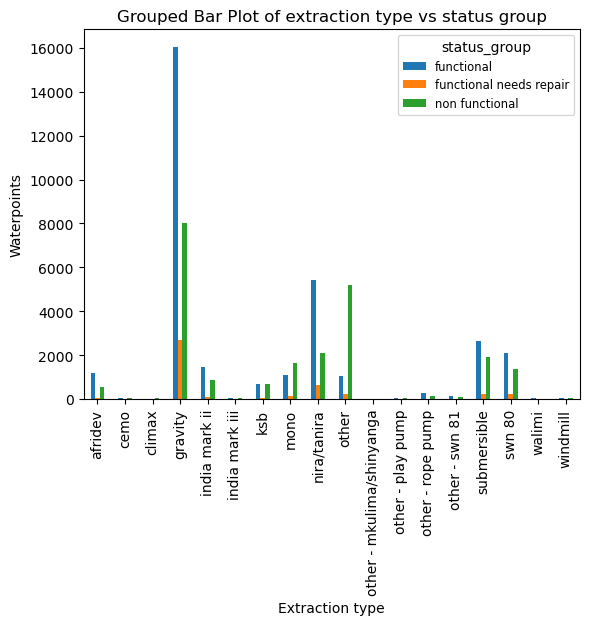

In [99]:
# extraction type
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['extraction_type', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of extraction type vs status group')
plt.xlabel('Extraction type')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

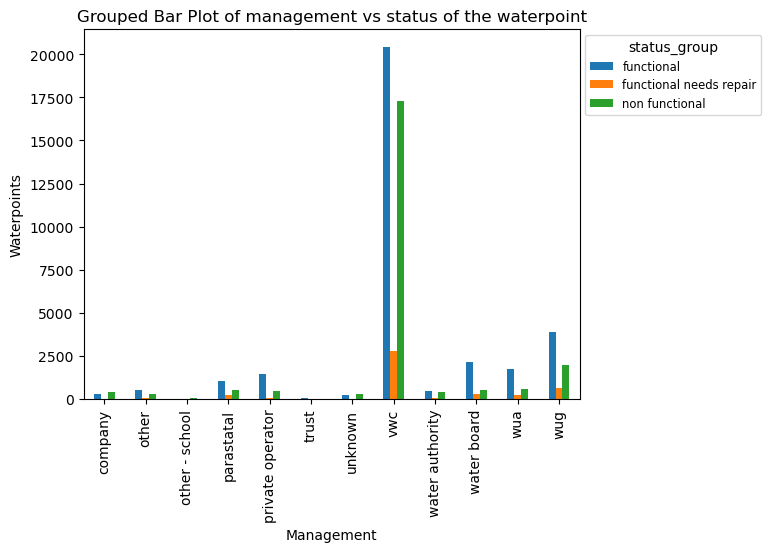

In [100]:
# management
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['management', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of management vs status of the waterpoint')
plt.xlabel('Management')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

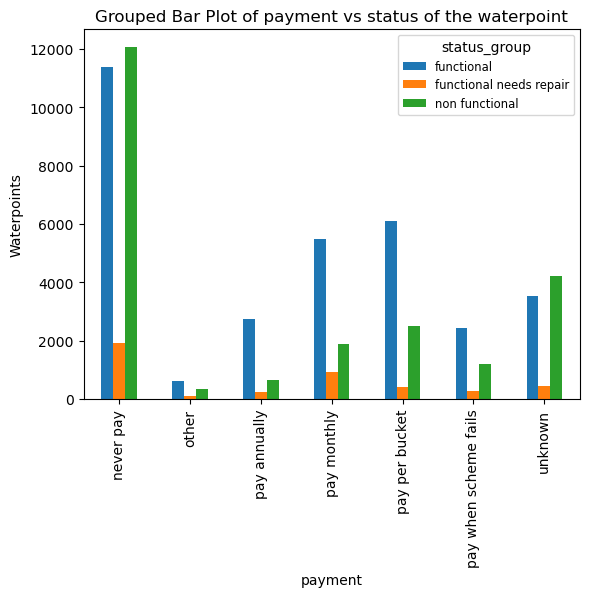

In [101]:
# payment
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['payment', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of payment vs status of the waterpoint')
plt.xlabel('payment')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

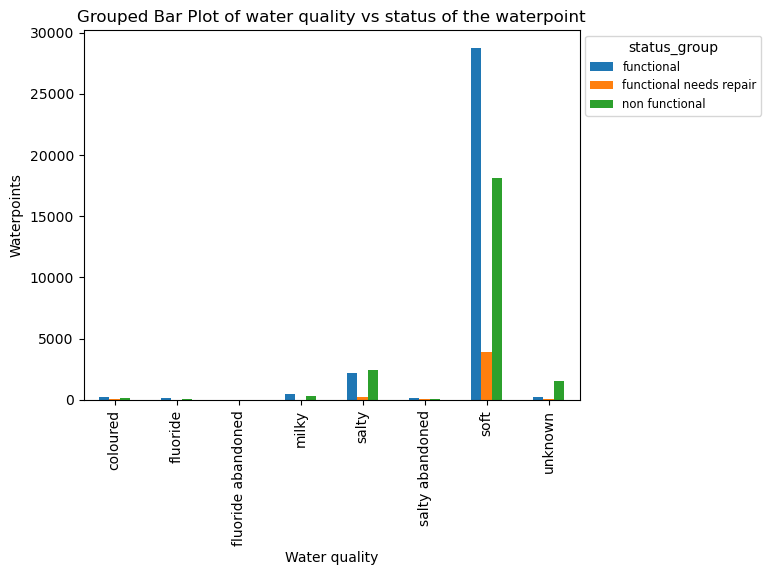

In [102]:
# water quality
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['water_quality', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of water quality vs status of the waterpoint')
plt.xlabel('Water quality')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

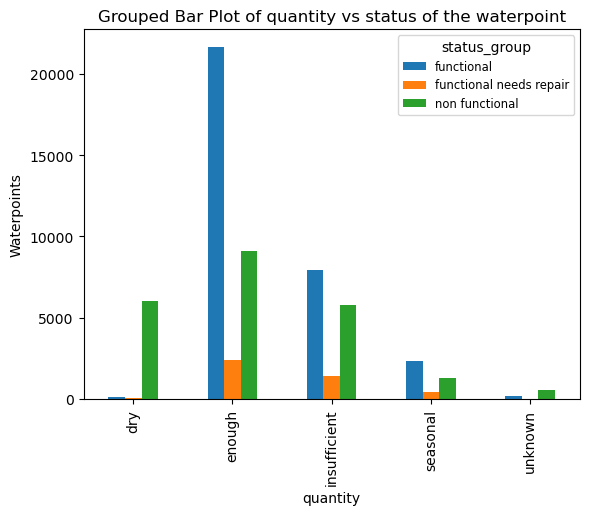

In [103]:
# water quantity
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['quantity', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of quantity vs status of the waterpoint')
plt.xlabel('quantity')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

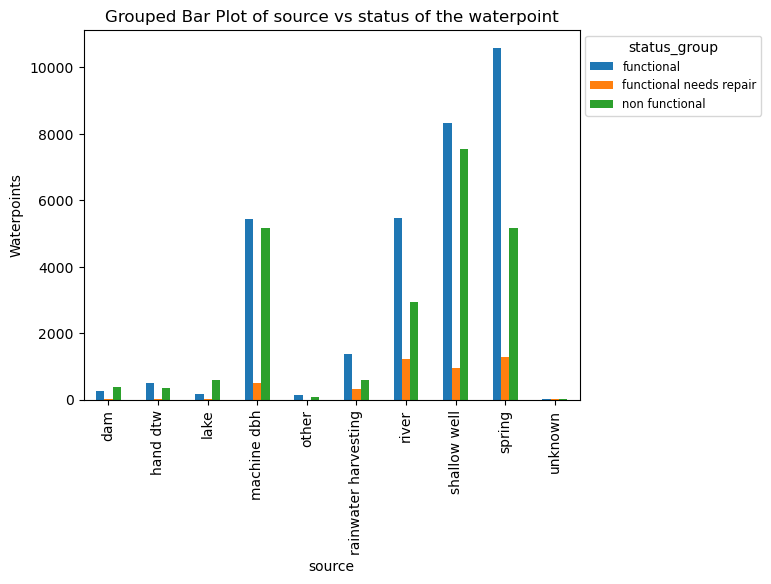

In [104]:
# source
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['source', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of source vs status of the waterpoint')
plt.xlabel('source')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

<Figure size 3000x1500 with 0 Axes>

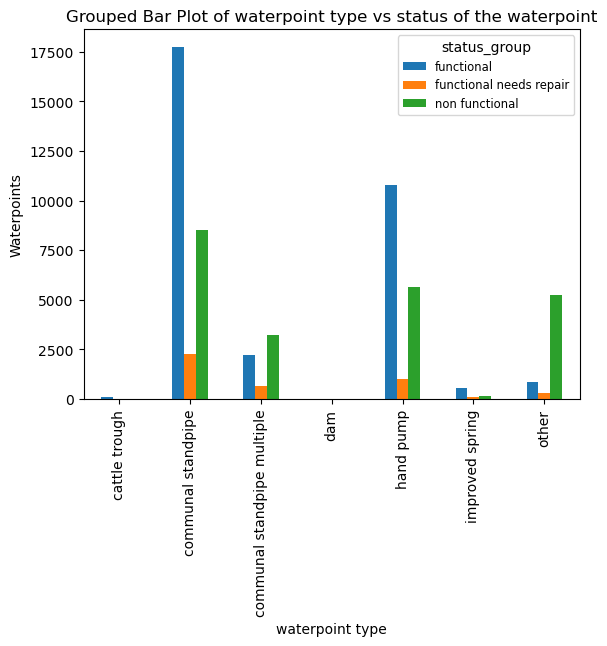

In [105]:
# waterpoint type
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['waterpoint_type', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of waterpoint type vs status of the waterpoint')
plt.xlabel('waterpoint type')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### Dropping columns

In [107]:
# dropping columns
df.drop(columns=['subvillage', 'region_code','id', 'date_recorded', 'num_private', 'recorded_by', 'district_code', 'lga', 
                 'ward', 'extraction_type_group', 'extraction_type_class', 'management_group', 
                 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'source_class', 
                 'waterpoint_type_group', 'construction_year'], 
        inplace=True)


In [108]:
df.columns.tolist()

['amount_tsh',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'basin',
 'region',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'status_group',
 'year_interval']

## Preprocessing

In [109]:
target_status_group = {'functional':1, 
                   'non functional': 0, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [110]:
numerical_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population']
categorical_columns = ['funder', 'installer', 'basin', 'region', 'public_meeting', 'scheme_management', 
                       'permit', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
                       'source', 'waterpoint_type', 'year_interval'] 

#### Numerical columns

In [111]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling Missing Values
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display preprocessed DataFrame
df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group,year_interval
0,1.895665,Roman,1.041252,Roman,0.131052,-1.408791,Lake Nyasa,Iringa,-0.150399,True,...,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,1,90-99
1,-0.105970,Grumeti,1.054237,GRUMETI,0.094610,1.207934,Lake Victoria,Mara,0.212290,NaN,...,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1,10-19
2,-0.097630,Lottery Club,0.025541,world vision,0.515158,0.639751,Pangani,Manyara,0.148660,True,...,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,1,00-09
3,-0.105970,Unicef,-0.584751,Unicef,0.671308,-1.849720,Ruvuma / Southern Coast,Mtwara,-0.258570,True,...,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0,80-89
4,-0.105970,Action In A,-0.964200,Artisan,-0.448669,1.317271,Lake Victoria,Kagera,-0.381587,True,...,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1,00-09


#### Categorical columns

In [112]:
df[categorical_columns].isnull().sum()

funder                  0
installer               0
basin                   0
region                  0
public_meeting       3334
scheme_management    3878
permit               3056
extraction_type         0
management              0
payment                 0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
year_interval           0
dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder

# Handling Missing Values
# Instantiate the imputer with strategy as 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in categorical columns
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

# 2. Encoding Categorical Variables
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each categorical column and encode it
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display preprocessed DataFrame
df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group,year_interval
0,1.895665,1367,1.041252,1471,0.131052,-1.408791,1,3,-0.150399,1,...,0,3,7,2,6,1,8,1,1,5
1,-0.105970,468,1.054237,512,0.094610,1.207934,4,9,0.212290,1,...,1,3,11,0,6,2,5,1,1,1
2,-0.097630,824,0.025541,2064,0.515158,0.639751,5,8,0.148660,1,...,1,3,7,4,6,1,0,2,1,0
3,-0.105970,1739,-0.584751,1815,0.671308,-1.849720,7,12,-0.258570,1,...,1,14,7,0,6,0,3,2,0,4
4,-0.105970,19,-0.964200,119,-0.448669,1.317271,4,4,-0.381587,1,...,1,3,1,0,6,3,5,1,1,0


### Multivariate Analysis

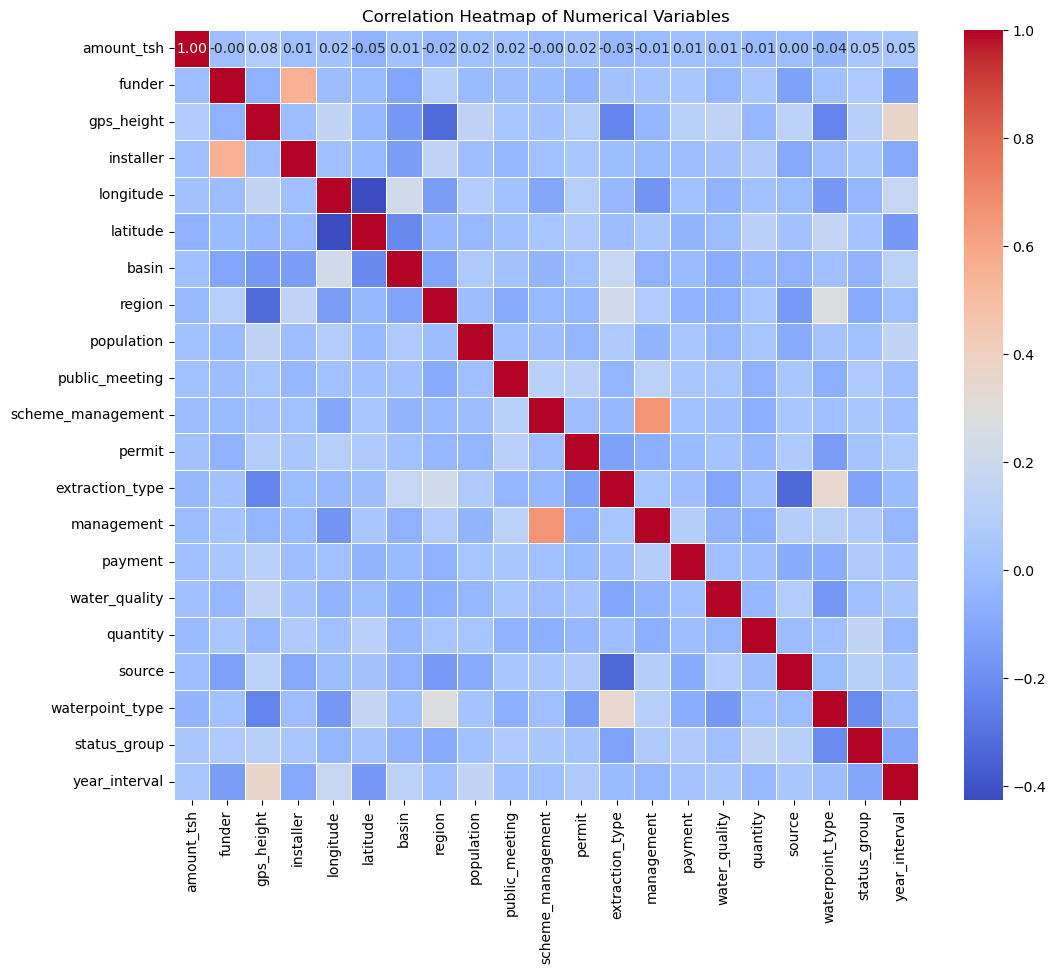

In [114]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
# saving the cleaned data to a csv file
df.to_csv('./cleaned_data.csv', index=False)

## Modelling

### Splitting Data

In [115]:
df = pd.read_csv('./cleaned_data.csv')
# Separating features and target variable
X = df.drop('status_group', axis=1)  # Features
y = df['status_group']  # Target variable

# X contains the features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Selection

In [ ]:
# Tree importance.

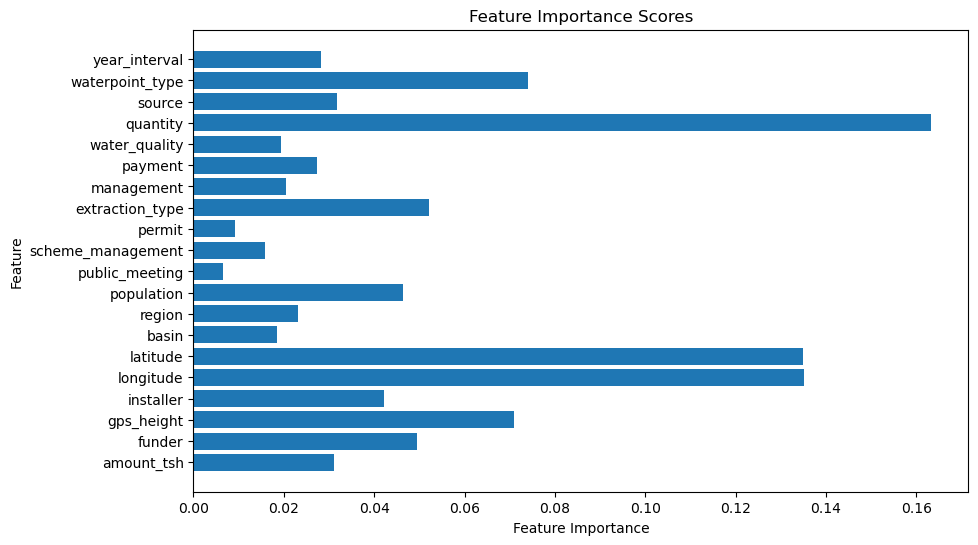

In [116]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

#### Selecting the most important feature

In [117]:
# Sorting features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]

# Selecting top twelve features
top_n = 12  
selected_features = sorted_features[:top_n]

# Subset data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### Baseline model - Logistic regression

In [118]:
# Instantiate Model
model = LogisticRegression()

# Train Model
model.fit(X_train_selected, y_train)

# Function to evaluate the model
def evaluate_model(model, X_test_selected, y_test):
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix, class_report

# Reorder columns
X_test_selected = X_test_selected[X_train_selected.columns]

# Model evaluation
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(model, X_test_selected, y_test)

# Evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6861111111111111
Precision: 0.6788955476166478
Recall: 0.6861111111111111
F1 Score: 0.666047141886934
Confusion Matrix:
[[1841 2731]
 [ 998 6310]]


This model has an accuracy of 68.1 % and an F1 score of 66.6 %.

### Decision Tree

In [119]:
# Instantiate Model
model = DecisionTreeClassifier()

# Train Model
model.fit(X_train_selected, y_train)

# Function to evaluate the model
def evaluate_model(model, X_test_selected, y_test):
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix, class_report

# Reorder columns
X_test_selected = X_test_selected[X_train_selected.columns]

# Model evaluation
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(model, X_test_selected, y_test)

# Evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8175084175084175
Precision: 0.8173061893800928
Recall: 0.8175084175084175
F1 Score: 0.8174026201387168
Confusion Matrix:
[[3474 1098]
 [1070 6238]]


This model has an accuracy of 81.8 % and an F1 score of 81.7 %.

### K-Nearest Neighbour

In [120]:
# Instanciate model
model = KNeighborsClassifier()

# Train Model
model.fit(X_train_selected, y_train)

# Function to evaluate the model
def evaluate_model(model, X_test_selected, y_test):
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix, class_report

# Reorder columns
X_test_selected = X_test_selected[X_train_selected.columns]

# Model evaluation
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(model, X_test_selected, y_test)

# Evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8072390572390572
Precision: 0.8056587894468605
Recall: 0.8072390572390572
F1 Score: 0.8044021235015038
Confusion Matrix:
[[3138 1434]
 [ 856 6452]]


This model has an accuracy of 80.7 % and an F1 score of 80.4 %.

### Hyperparameter Tuning - Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Defining the hyperparameter space
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],     # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,            # Number of parameter settings that are sampled
    scoring='accuracy',    # Evaluation metric
    cv=5,                  # Cross-validation strategy
    verbose=1,
    n_jobs=-1              # Number of CPU cores to use. -1 means use all available cores.
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


## Conclusion
1. The funder and installer of a waterpoint greatly influence it's construction and thereby its performance.
2. There were more functional waterpoints than non-functional in the dataframe.
3. The decision tree model was the best performing.
   

## Recommendations
1. The decision tree model gave the best results, an accuracy of 81.8%
2. More models can be explored given resources.